In [1]:
import csv
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.font_manager import FontProperties
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

ModuleNotFoundError: No module named 'sklearn'

In [3]:
df = pd.read_csv('./age.csv', encoding='utf-8')
df

年月        地區 產業別  性別        年齡層  信用卡交易筆數  信用卡交易金額[新台幣]
0       201401  10007000   衣   2      未滿20歲      282        574794
1       201401  10007000   衣   2  20(含)-25歲     7091      16563668
2       201401  10007000   衣   2  25(含)-30歲    20467      52197577
3       201401  10007000   衣   2  30(含)-35歲    35400      93635594
4       201401  10007000   衣   2  35(含)-40歲    41102     113811652
...        ...       ...  ..  ..        ...      ...           ...
500187  202308  67000000  其他   1  60(含)-65歲     5961      29661357
500188  202308  67000000  其他   1  65(含)-70歲     3808      21203594
500189  202308  67000000  其他   1  70(含)-75歲     2213      12924404
500190  202308  67000000  其他   1  75(含)-80歲      680       4171218
500191  202308  67000000  其他   1   80(含)歲以上      389       2001953

[500192 rows x 7 columns]

In [28]:
df_other = df[(df['產業別'] == '其他')] 
sum_other_account = df_other['信用卡交易筆數'].sum()
sum_other_amt = df_other['信用卡交易金額[新台幣]'].sum()
sum_account = df['信用卡交易筆數'].sum()
sum_amt = df['信用卡交易金額[新台幣]'].sum()



print(f"其他類信用卡交易筆數:{sum_other_account},佔總筆數:{sum_other_account/sum_account:.2f}\n其他類信用卡交易金額:{sum_other_amt},佔總金額:{sum_other_amt/sum_amt:.2f}")
print(f"信用卡交易筆數:{sum_account}\n信用卡交易金額:{sum_amt}")

其他類信用卡交易筆數:2701648426,佔總筆數:0.24
其他類信用卡交易金額:9328714755269,佔總金額:0.42
信用卡交易筆數:11116183029
信用卡交易金額:22243643269328


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500192 entries, 0 to 500191
Data columns (total 7 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   年月            500192 non-null  int64 
 1   地區            500192 non-null  int64 
 2   產業別           500192 non-null  object
 3   性別            500192 non-null  int64 
 4   年齡層           500192 non-null  object
 5   信用卡交易筆數       500192 non-null  int64 
 6   信用卡交易金額[新台幣]  500192 non-null  int64 
dtypes: int64(5), object(2)
memory usage: 26.7+ MB


In [5]:
df.describe(include='all')

年月            地區     產業別        性別     年齡層       信用卡交易筆數  \
count   500192.000000  5.001920e+05  500192  500192.0  500192  5.001920e+05   
unique            NaN           NaN       7       NaN      14           NaN   
top               NaN           NaN       衣       NaN   未滿20歲           NaN   
freq              NaN           NaN   71456       NaN   35728           NaN   
mean    201840.844828  2.505386e+07     NaN       1.5     NaN  2.222383e+04   
std        279.293278  2.478577e+07     NaN       0.5     NaN  1.270565e+05   
min     201401.000000  9.007000e+06     NaN       1.0     NaN -7.000000e+00   
25%     201605.750000  1.000700e+07     NaN       1.0     NaN  1.880000e+02   
50%     201810.500000  1.001450e+07     NaN       1.5     NaN  1.344000e+03   
75%     202103.250000  6.300000e+07     NaN       2.0     NaN  6.842000e+03   
max     202308.000000  6.800000e+07     NaN       2.0     NaN  3.828945e+06   

        信用卡交易金額[新台幣]  
count   5.001920e+05  
unique           NaN  
top              NaN  
freq             NaN  
mean    4.447021e+07  
std     2.986701e+08  
min    -9.275543e+07  
25%     4.370198e+05  
50%     3.253022e+06  
75%     1.426566e+07  
max     2.660613e+10

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500192 entries, 0 to 500191
Data columns (total 7 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   年月            500192 non-null  int64 
 1   地區            500192 non-null  int64 
 2   產業別           500192 non-null  object
 3   性別            500192 non-null  int64 
 4   年齡層           500192 non-null  object
 5   信用卡交易筆數       500192 non-null  int64 
 6   信用卡交易金額[新台幣]  500192 non-null  int64 
dtypes: int64(5), object(2)
memory usage: 26.7+ MB


In [7]:
#檢視資料是否重覆
df.duplicated()

0         False
1         False
2         False
3         False
4         False
          ...  
500187    False
500188    False
500189    False
500190    False
500191    False
Length: 500192, dtype: bool

觀察下載之檔案資料共有500192 rows × 7 columns,"年月"、"地區"、"性別"資料型態為int64，
為資料呈現時便利性，將以下變更:
-1.年、月分別以個欄位呈現
-2.地區依資料來源單位提供之對應地區呈現
-3.性別改以文字呈現
修正後之資料另儲存為age_trans.csv

In [33]:

df = pd.read_csv('./age_trans.csv')
df

年  月   地區 產業別  性別        年齡層  信用卡交易筆數  信用卡交易金額[新台幣]
0       2014  1  彰化縣   衣  女性      未滿20歲      282        574794
1       2014  1  彰化縣   衣  女性  20(含)-25歲     7091      16563668
2       2014  1  彰化縣   衣  女性  25(含)-30歲    20467      52197577
3       2014  1  彰化縣   衣  女性  30(含)-35歲    35400      93635594
4       2014  1  彰化縣   衣  女性  35(含)-40歲    41102     113811652
...      ... ..  ...  ..  ..        ...      ...           ...
500187  2023  8  臺南市  其他  男性  60(含)-65歲     5961      29661357
500188  2023  8  臺南市  其他  男性  65(含)-70歲     3808      21203594
500189  2023  8  臺南市  其他  男性  70(含)-75歲     2213      12924404
500190  2023  8  臺南市  其他  男性  75(含)-80歲      680       4171218
500191  2023  8  臺南市  其他  男性   80(含)歲以上      389       2001953

[500192 rows x 8 columns]

In [123]:
df.describe(include='all')

年              月      地區     產業別      性別     年齡層  \
count   500192.000000  500192.000000  500192  500192  500192  500192   
unique            NaN            NaN      22       7       2      14   
top               NaN            NaN     彰化縣       衣      女性   未滿20歲   
freq              NaN            NaN   22736   71456  250096   35728   
mean      2018.344828       6.362069     NaN     NaN     NaN     NaN   
std          2.795021       3.422537     NaN     NaN     NaN     NaN   
min       2014.000000       1.000000     NaN     NaN     NaN     NaN   
25%       2016.000000       3.000000     NaN     NaN     NaN     NaN   
50%       2018.000000       6.000000     NaN     NaN     NaN     NaN   
75%       2021.000000       9.000000     NaN     NaN     NaN     NaN   
max       2023.000000      12.000000     NaN     NaN     NaN     NaN   

             信用卡交易筆數  信用卡交易金額[新台幣]  
count   5.001920e+05  5.001920e+05  
unique           NaN           NaN  
top              NaN           NaN  
freq             NaN           NaN  
mean    2.222383e+04  4.447021e+07  
std     1.270565e+05  2.986701e+08  
min    -7.000000e+00 -9.275543e+07  
25%     1.880000e+02  4.370198e+05  
50%     1.344000e+03  3.253022e+06  
75%     6.842000e+03  1.426566e+07  
max     3.828945e+06  2.660613e+10

In [124]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500192 entries, 0 to 500191
Data columns (total 8 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   年             500192 non-null  int64 
 1   月             500192 non-null  int64 
 2   地區            500192 non-null  object
 3   產業別           500192 non-null  object
 4   性別            500192 non-null  object
 5   年齡層           500192 non-null  object
 6   信用卡交易筆數       500192 non-null  int64 
 7   信用卡交易金額[新台幣]  500192 non-null  int64 
dtypes: int64(4), object(4)
memory usage: 30.5+ MB


In [125]:
df.describe(include='all')

年              月      地區     產業別      性別     年齡層  \
count   500192.000000  500192.000000  500192  500192  500192  500192   
unique            NaN            NaN      22       7       2      14   
top               NaN            NaN     彰化縣       衣      女性   未滿20歲   
freq              NaN            NaN   22736   71456  250096   35728   
mean      2018.344828       6.362069     NaN     NaN     NaN     NaN   
std          2.795021       3.422537     NaN     NaN     NaN     NaN   
min       2014.000000       1.000000     NaN     NaN     NaN     NaN   
25%       2016.000000       3.000000     NaN     NaN     NaN     NaN   
50%       2018.000000       6.000000     NaN     NaN     NaN     NaN   
75%       2021.000000       9.000000     NaN     NaN     NaN     NaN   
max       2023.000000      12.000000     NaN     NaN     NaN     NaN   

             信用卡交易筆數  信用卡交易金額[新台幣]  
count   5.001920e+05  5.001920e+05  
unique           NaN           NaN  
top              NaN           NaN  
freq             NaN           NaN  
mean    2.222383e+04  4.447021e+07  
std     1.270565e+05  2.986701e+08  
min    -7.000000e+00 -9.275543e+07  
25%     1.880000e+02  4.370198e+05  
50%     1.344000e+03  3.253022e+06  
75%     6.842000e+03  1.426566e+07  
max     3.828945e+06  2.660613e+10

In [126]:
#檢視是有空值
df.isnull()

年      月     地區    產業別     性別    年齡層  信用卡交易筆數  信用卡交易金額[新台幣]
0       False  False  False  False  False  False    False         False
1       False  False  False  False  False  False    False         False
2       False  False  False  False  False  False    False         False
3       False  False  False  False  False  False    False         False
4       False  False  False  False  False  False    False         False
...       ...    ...    ...    ...    ...    ...      ...           ...
500187  False  False  False  False  False  False    False         False
500188  False  False  False  False  False  False    False         False
500189  False  False  False  False  False  False    False         False
500190  False  False  False  False  False  False    False         False
500191  False  False  False  False  False  False    False         False

[500192 rows x 8 columns]

In [4]:
df

年月        地區 產業別  性別        年齡層  信用卡交易筆數  信用卡交易金額[新台幣]
0       201401  10007000   衣   2      未滿20歲      282        574794
1       201401  10007000   衣   2  20(含)-25歲     7091      16563668
2       201401  10007000   衣   2  25(含)-30歲    20467      52197577
3       201401  10007000   衣   2  30(含)-35歲    35400      93635594
4       201401  10007000   衣   2  35(含)-40歲    41102     113811652
...        ...       ...  ..  ..        ...      ...           ...
500187  202308  67000000  其他   1  60(含)-65歲     5961      29661357
500188  202308  67000000  其他   1  65(含)-70歲     3808      21203594
500189  202308  67000000  其他   1  70(含)-75歲     2213      12924404
500190  202308  67000000  其他   1  75(含)-80歲      680       4171218
500191  202308  67000000  其他   1   80(含)歲以上      389       2001953

[500192 rows x 7 columns]

In [47]:
x= pd.DataFrame([(5961,29661357),(3808,21203594),(2213,12924404)],columns=['counts','values'])
print(x['values'])
x1 = x['values'] / 1000000
x1.astype(int)

0    29661357
1    21203594
2    12924404
Name: values, dtype: int64


0    29
1    21
2    12
Name: values, dtype: int32

年         年齡層           2014           2015           2016           2017  \
0   20(含)-25歲   32574.854989   37891.418080   39841.448452   41841.374863   
1   25(含)-30歲  122394.509283  130084.217832  134776.151933  136162.063817   
2   30(含)-35歲  225743.566307  231461.926568  226365.657839  209957.146515   
3   35(含)-40歲  277335.100879  294495.929367  294308.877105  282204.334940   
4   40(含)-45歲  279120.417970  293279.584741  297147.451611  295614.826157   
5   45(含)-50歲  268637.010740  290250.599505  296727.579226  293136.144216   
6   50(含)-55歲  218221.109322  243771.201074  256342.813840  254653.339346   
7   55(含)-60歲  151862.713861  172029.654279  180104.544042  183317.035298   
8   60(含)-65歲   92328.624507  112111.064022  119679.447639  122391.823090   
9   65(含)-70歲   34004.557124   46847.661678   59715.535550   68513.606878   
10  70(含)-75歲   13610.400878   16705.099436   18459.440050   21033.009815   
11  75(含)-80歲    5095.916852    6816.322117    7653.581511    8626.770722   

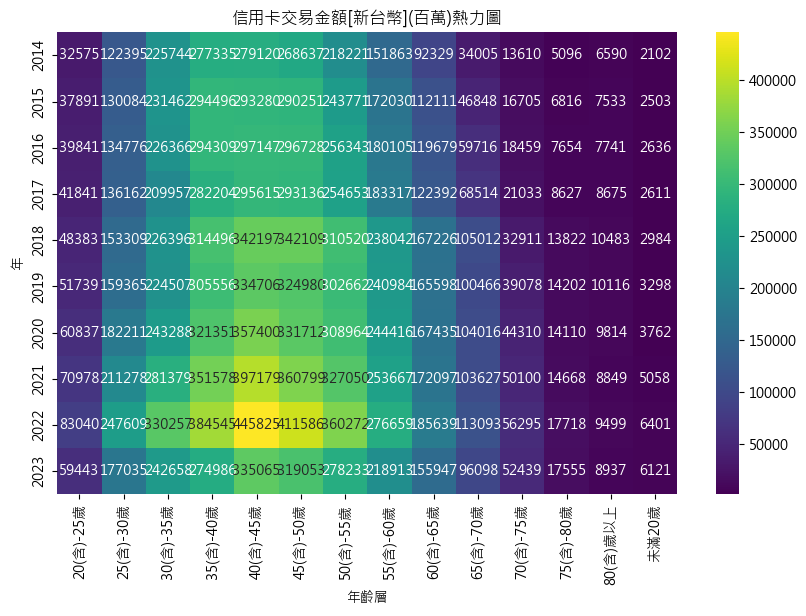

In [144]:
df['信用卡交易金額[新台幣]'] = df['信用卡交易金額[新台幣]']/1000000
df['信用卡交易筆數'] = df['信用卡交易筆數']/1000000

grouped_data = df.groupby(['年', '年齡層']).agg({'信用卡交易金額[新台幣]': 'sum', '信用卡交易筆數': 'sum'}).reset_index()


# 計算 '平均交易金額'
grouped_data['平均交易金額'] = grouped_data['信用卡交易金額[新台幣]'] / grouped_data['信用卡交易筆數']

# 重新組織資料，使之符合你的格式
pivot_table_year = grouped_data.pivot_table(index='年齡層', columns='年', values='信用卡交易金額[新台幣]', aggfunc='mean')

#  四捨五入並轉換為整數
#pivot_table_year = pivot_table_year.round().astype(int)


# 將 '年齡層' 移到列(index)
pivot_table_year.reset_index(inplace=True)

# 顯示結果
print(pivot_table_year)

plt.rcParams['font.family'] = 'Microsoft JhengHei'
plt.figure(figsize=(10, 6))
sns.heatmap(pivot_table_year.set_index('年齡層').T, cmap='viridis', annot=True, fmt=".0f")
plt.title('信用卡交易金額[新台幣](百萬)熱力圖')
plt.show()

年         年齡層        2014        2015        2016        2017        2018  \
0   20(含)-25歲   18.468325   21.550397   23.717422   25.514134   31.591523   
1   25(含)-30歲   62.896895   67.864810   72.350057   73.191305   85.378162   
2   30(含)-35歲  107.058503  113.466515  114.421235  104.888565  112.910865   
3   35(含)-40歲  121.667258  133.458920  138.115141  130.448493  142.303753   
4   40(含)-45歲  112.310536  120.280076  125.246082  121.597055  132.753399   
5   45(含)-50歲   98.428270  107.577787  111.862570  106.827290  114.629373   
6   50(含)-55歲   73.738005   82.351338   86.865387   84.076304   92.181482   
7   55(含)-60歲   48.557722   54.160034   56.941539   56.440197   63.965352   
8   60(含)-65歲   28.532180   33.344176   36.045888   35.835315   40.324755   
9   65(含)-70歲   10.456382   13.515740   16.477831   18.303494   21.837152   
10  70(含)-75歲    4.036495    4.649644    4.933501    5.492417    6.930581   
11  75(含)-80歲    1.512387    1.849258    2.100558    2.266924    2.663358   

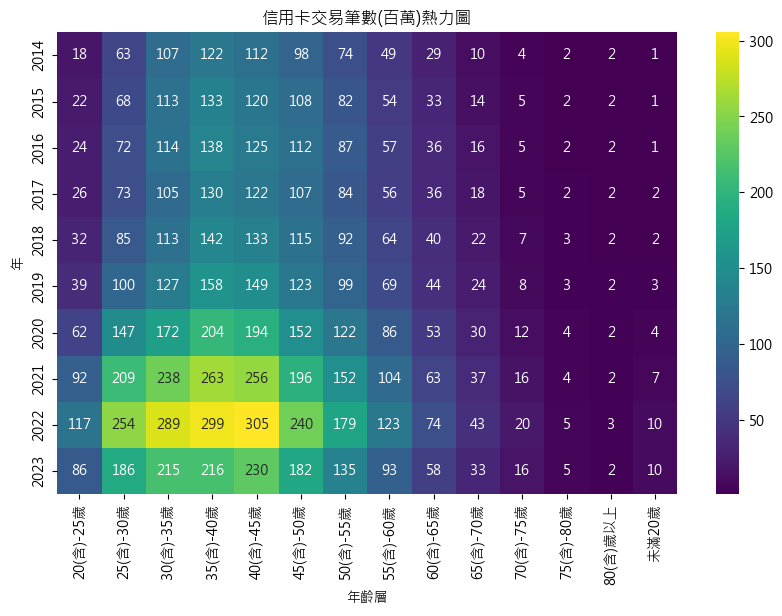

In [130]:
grouped_data = df.groupby(['年', '年齡層']).agg({'信用卡交易金額[新台幣]': 'sum', '信用卡交易筆數': 'sum'}).reset_index()


# 計算 '平均交易金額'
grouped_data['平均交易金額'] = grouped_data['信用卡交易金額[新台幣]'] / grouped_data['信用卡交易筆數']

# 重新組織資料，使之符合你的格式
pivot_table_year = grouped_data.pivot_table(index='年齡層', columns='年', values='信用卡交易筆數', aggfunc='mean')

#  四捨五入並轉換為整數
#pivot_table_year = pivot_table_year.round().astype(int)


# 將 '年齡層' 移到列(index)
pivot_table_year.reset_index(inplace=True)

# 顯示結果
print(pivot_table_year)

plt.rcParams['font.family'] = 'Microsoft JhengHei'
plt.figure(figsize=(10, 6))
sns.heatmap(pivot_table_year.set_index('年齡層').T, cmap='viridis', annot=True, fmt=".0f")
plt.title('信用卡交易筆數(百萬)熱力圖')
plt.show()

年         年齡層  2014  2015  2016  2017  2018  2019  2020  2021  2022  2023
0   20(含)-25歲  1764  1758  1680  1640  1532  1329   989   769   709   688
1   25(含)-30歲  1946  1917  1863  1860  1796  1592  1237  1013   976   950
2   30(含)-35歲  2109  2040  1978  2002  2005  1770  1418  1182  1144  1127
3   35(含)-40歲  2279  2207  2131  2163  2210  1940  1576  1338  1287  1274
4   40(含)-45歲  2485  2438  2373  2431  2578  2249  1838  1554  1459  1460
5   45(含)-50歲  2729  2698  2653  2744  2984  2650  2188  1845  1718  1751
6   50(含)-55歲  2959  2960  2951  3029  3369  3055  2530  2153  2014  2067
7   55(含)-60歲  3127  3176  3163  3248  3721  3471  2859  2428  2243  2350
8   60(含)-65歲  3236  3362  3320  3415  4147  3794  3171  2749  2492  2706
9   65(含)-70歲  3252  3466  3624  3743  4809  4126  3418  2814  2618  2893
10  70(含)-75歲  3372  3593  3742  3829  4749  4673  3837  3208  2801  3192
11  75(含)-80歲  3369  3686  3644  3805  5190  4902  4023  3512  3235  3736
12   80(含)歲以上  3988  4095  4260  4235 

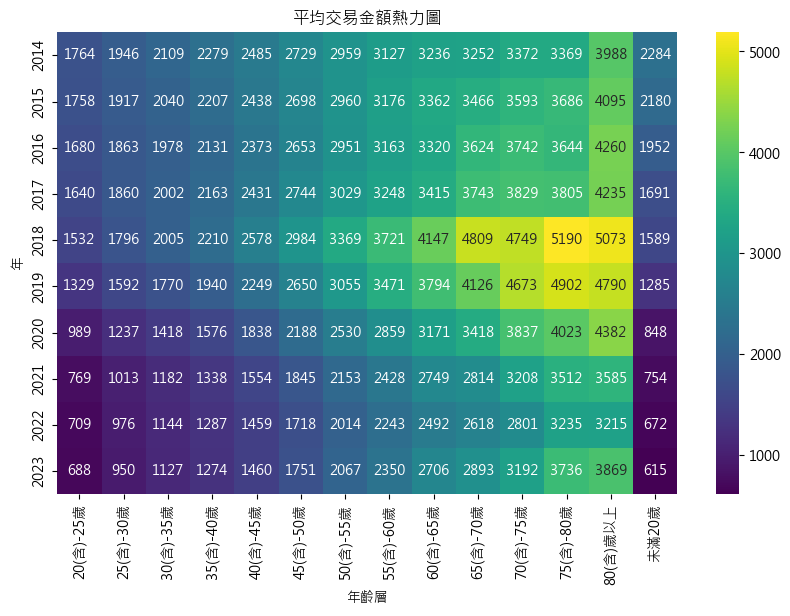

In [131]:
grouped_data = df.groupby(['年', '年齡層']).agg({'信用卡交易金額[新台幣]': 'sum', '信用卡交易筆數': 'sum'}).reset_index()


# 計算 '平均交易金額'
grouped_data['平均交易金額'] = grouped_data['信用卡交易金額[新台幣]'] / grouped_data['信用卡交易筆數']

# 重新組織資料，使之符合你的格式
pivot_table_year = grouped_data.pivot_table(index='年齡層', columns='年', values='平均交易金額', aggfunc='mean')

#  四捨五入並轉換為整數
pivot_table_year = pivot_table_year.round().astype(int)


# 將 '年齡層' 移到列(index)
pivot_table_year.reset_index(inplace=True)

# 顯示結果
print(pivot_table_year)

plt.rcParams['font.family'] = 'Microsoft JhengHei'
plt.figure(figsize=(10, 6))
sns.heatmap(pivot_table_year.set_index('年齡層').T, cmap='viridis', annot=True, fmt=".0f")
plt.title('平均交易金額熱力圖')
plt.show()

地區        年齡層           南投縣           嘉義市          嘉義縣          基隆市  \
0   20(含)-25歲   2082.385102   4275.022196  1052.578698  1676.346859   
1   25(含)-30歲   6476.557748  12549.537373  3154.397868  4659.240379   
2   30(含)-35歲  10118.189794  18718.759871  5029.043565  6317.661188   
3   35(含)-40歲  13719.980415  23899.264343  6589.249884  8081.299971   
4   40(含)-45歲  16141.328591  26720.821419  7139.495361  9341.102399   
5   45(含)-50歲  16556.313712  25912.264465  6932.471088  9539.646267   
6   50(含)-55歲  15143.523720  21811.091229  6129.577284  8827.769173   
7   55(含)-60歲  11646.182338  14923.776654  4518.370650  6983.985565   
8   60(含)-65歲   7484.535463   8795.141289  2779.921012  4815.759940   
9   65(含)-70歲   3633.366311   4439.186582  1373.610342  2534.894509   
10  70(含)-75歲   1304.585117   1687.502038   506.906462   939.999274   
11  75(含)-80歲    410.603534    597.185236   153.167916   289.552007   
12   80(含)歲以上    291.903648    431.323728   105.040637   221.760118   
13    

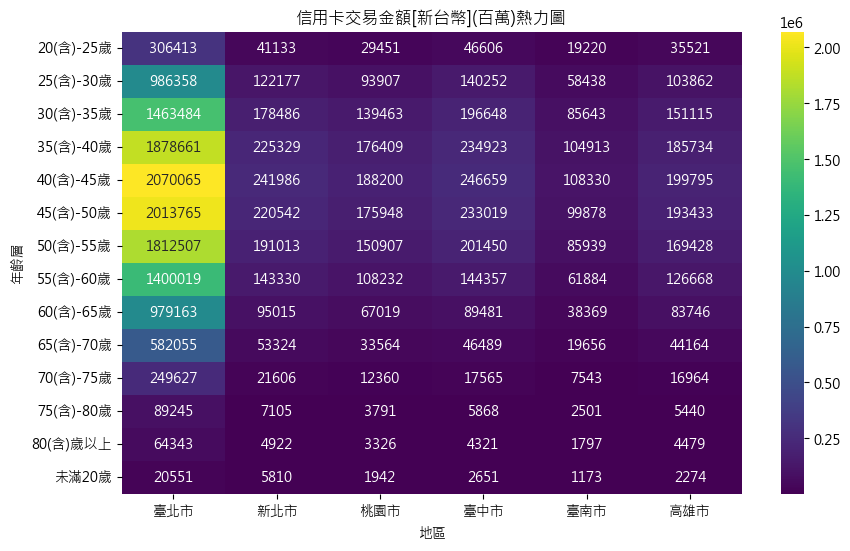

In [132]:

grouped_data = df.groupby(['年齡層', '地區']).agg({'信用卡交易金額[新台幣]': 'sum', '信用卡交易筆數': 'sum'}).reset_index()

# 計算 '平均交易金額'
#grouped_data['平均交易金額'] = grouped_data['信用卡交易金額[新台幣]'] / grouped_data['信用卡交易筆數']


pivot_table_industry = grouped_data.pivot_table(index='年齡層', columns='地區', values='信用卡交易金額[新台幣]', aggfunc='mean')

# 將 '平均交易金額' 四捨五入並轉換為整數
#pivot_table_industry = pivot_table_industry.round().astype(int)

# 將 '年齡層' 移到列(index)
pivot_table_industry.reset_index(inplace=True)

# 顯示結果
print(pivot_table_industry)

plt.rcParams['font.family'] = 'Microsoft JhengHei'
plt.figure(figsize=(10, 6))
sns.heatmap(pivot_table_industry.set_index('年齡層')[['臺北市', '新北市', '桃園市', '臺中市', '臺南市','高雄市']], cmap='viridis', annot=True, fmt=".0f")
plt.title('信用卡交易金額[新台幣](百萬)熱力圖')
plt.show()

地區        年齡層       南投縣        嘉義市       嘉義縣       基隆市        宜蘭縣        屏東縣  \
0   20(含)-25歲  1.624674   2.641254  1.213974  1.254858   2.630426   3.109121   
1   25(含)-30歲  4.131285   6.481877  2.737238  2.850415   6.038572   6.661664   
2   30(含)-35歲  5.832666   8.939103  3.866530  3.756639   8.006142   8.851054   
3   35(含)-40歲  7.356164  11.136494  4.761677  4.721302  10.191005  11.038339   
4   40(含)-45歲  7.795419  11.789065  4.756990  5.190368  10.888940  11.512908   
5   45(含)-50歲  7.369004  10.812898  4.309339  5.039153   9.919050  10.352863   
6   50(含)-55歲  6.473644   8.768134  3.617434  4.536184   8.169279   8.456261   
7   55(含)-60歲  4.780301   5.873163  2.560182  3.558992   5.846687   6.021973   
8   60(含)-65歲  3.031442   3.522234  1.537236  2.487427   3.727053   3.779412   
9   65(含)-70歲  1.497103   1.864010  0.827419  1.369330   1.958678   1.970601   
10  70(含)-75歲  0.546295   0.746880  0.305706  0.523968   0.736049   0.759057   
11  75(含)-80歲  0.164756   0.263938  0.09

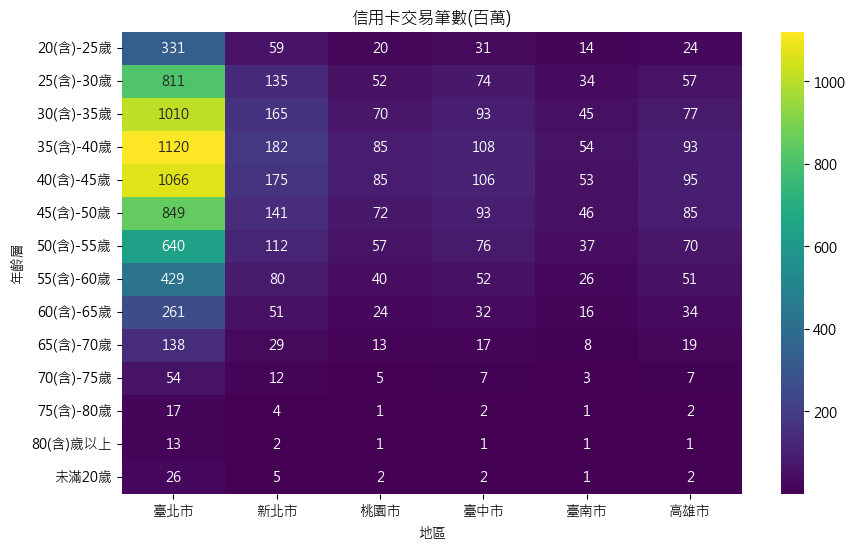

In [133]:

grouped_data = df.groupby(['年齡層', '地區']).agg({'信用卡交易金額[新台幣]': 'sum', '信用卡交易筆數': 'sum'}).reset_index()

# 計算 '平均交易金額'
#grouped_data['平均交易金額'] = grouped_data['信用卡交易金額[新台幣]'] / grouped_data['信用卡交易筆數']


pivot_table_industry = grouped_data.pivot_table(index='年齡層', columns='地區', values='信用卡交易筆數', aggfunc='mean')

# 將 '平均交易金額' 四捨五入並轉換為整數
#pivot_table_industry = pivot_table_industry.round().astype(int)

# 將 '年齡層' 移到列(index)
pivot_table_industry.reset_index(inplace=True)

# 顯示結果
print(pivot_table_industry)

plt.rcParams['font.family'] = 'Microsoft JhengHei'
plt.figure(figsize=(10, 6))
sns.heatmap(pivot_table_industry.set_index('年齡層')[['臺北市', '新北市', '桃園市', '臺中市', '臺南市','高雄市']], cmap='viridis', annot=True, fmt=".0f")
plt.title('信用卡交易筆數(百萬)')
plt.show()

地區        年齡層          南投縣          嘉義市          嘉義縣          基隆市  \
0   20(含)-25歲  1281.724889  1618.557774   867.052093  1335.885701   
1   25(含)-30歲  1567.686022  1936.096191  1152.401752  1634.583167   
2   30(含)-35歲  1734.745277  2094.031120  1300.660687  1681.732311   
3   35(含)-40歲  1865.099856  2146.031268  1383.808663  1711.667665   
4   40(含)-45歲  2070.617191  2266.576817  1500.843046  1799.699443   
5   45(含)-50歲  2246.750539  2396.421798  1608.708688  1893.105105   
6   50(含)-55歲  2339.258031  2487.540819  1694.454490  1946.078284   
7   55(含)-60歲  2436.286405  2541.011829  1764.863064  1962.349330   
8   60(含)-65歲  2468.968716  2497.034918  1808.389221  1936.040712   
9   65(含)-70歲  2426.931421  2381.525089  1660.114576  1851.193291   
10  70(含)-75歲  2388.059779  2259.401829  1658.150190  1794.001302   
11  75(含)-80歲  2492.191690  2262.596655  1626.228059  1887.758873   
12   80(含)歲以上  2962.225731  2486.603336  2141.763253  2500.508739   
13      未滿20歲  1762.848701  1548.0

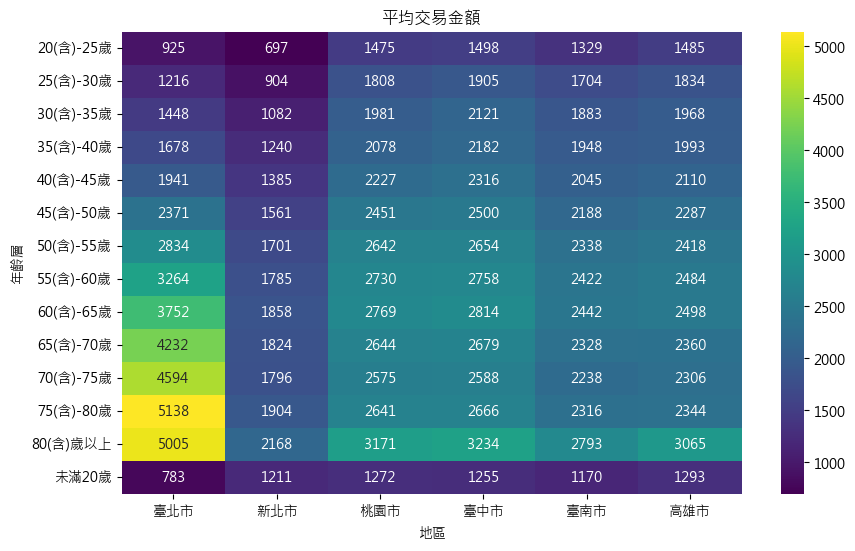

In [134]:
grouped_data = df.groupby(['年齡層', '地區']).agg({'信用卡交易金額[新台幣]': 'sum', '信用卡交易筆數': 'sum'}).reset_index()

# 計算 '平均交易金額'
grouped_data['平均交易金額'] = grouped_data['信用卡交易金額[新台幣]'] / grouped_data['信用卡交易筆數']


pivot_table_industry = grouped_data.pivot_table(index='年齡層', columns='地區', values='平均交易金額', aggfunc='mean')

# 將 '平均交易金額' 四捨五入並轉換為整數
#pivot_table_industry = pivot_table_industry.round().astype(int)

# 將 '年齡層' 移到列(index)
pivot_table_industry.reset_index(inplace=True)

# 顯示結果
print(pivot_table_industry)

plt.rcParams['font.family'] = 'Microsoft JhengHei'
plt.figure(figsize=(10, 6))
sns.heatmap(pivot_table_industry.set_index('年齡層')[['臺北市', '新北市', '桃園市', '臺中市', '臺南市','高雄市']], cmap='viridis', annot=True, fmt=".0f")
plt.title('平均交易金額')
plt.show()

產業別        年齡層              住            其他           文教康樂             百貨  \
0    20(含)-25歲   30942.275043  1.468360e+05   90756.707054   97458.051030   
1    25(含)-30歲  107400.061861  5.362622e+05  240233.640938  305085.317104   
2    30(含)-35歲  171026.817001  8.636393e+05  305737.391537  436052.789182   
3    35(含)-40歲  209239.446920  1.196800e+06  362125.751171  529578.853319   
4    40(含)-45歲  219603.937752  1.376750e+06  409228.634725  550681.428732   
5    45(含)-50歲  201350.596187  1.394083e+06  409833.889771  490422.194173   
6    50(含)-55歲  172464.782961  1.298783e+06  347344.165314  412166.075328   
7    55(含)-60歲  129699.376300  1.031455e+06  236235.104726  296759.370113   
8    60(含)-65歲   85048.439691  7.340972e+05  152077.625126  187641.011862   
9    65(含)-70歲   44468.457622  4.394924e+05   85343.754057  104049.239182   
10   70(含)-75歲   16849.926618  1.877039e+05   34079.970157   44946.531001   
11   75(含)-80歲    5896.609547  6.720408e+04   12273.322169   14206.108560   

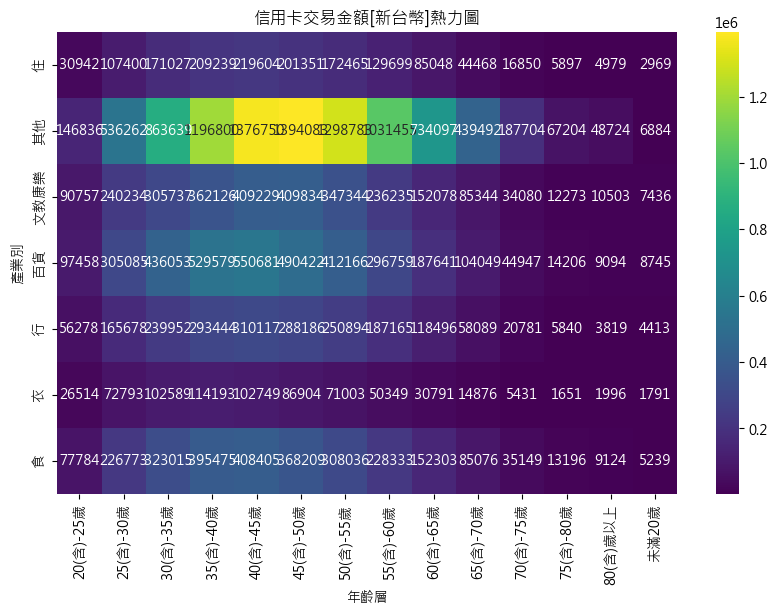

In [135]:


grouped_data = df.groupby(['產業別', '年齡層']).agg({'信用卡交易金額[新台幣]': 'sum', '信用卡交易筆數': 'sum'}).reset_index()


# 計算 '平均交易金額'
grouped_data['平均交易金額'] = grouped_data['信用卡交易金額[新台幣]'] / grouped_data['信用卡交易筆數']

# 重新組織資料，使之符合你的格式
pivot_table_year = grouped_data.pivot_table(index='年齡層', columns='產業別', values='信用卡交易金額[新台幣]', aggfunc='mean')

#  四捨五入並轉換為整數
#pivot_table_year = pivot_table_year.round().astype(int)


# 將 '年齡層' 移到列(index)
pivot_table_year.reset_index(inplace=True)

# 顯示結果
print(pivot_table_year)

plt.rcParams['font.family'] = 'Microsoft JhengHei'
plt.figure(figsize=(10, 6))
sns.heatmap(pivot_table_year.set_index('年齡層').T, cmap='viridis', annot=True, fmt=".0f")
plt.title('信用卡交易金額[新台幣](百萬)熱力圖')
plt.show()

產業別        年齡層          住          其他        文教康樂          百貨           行  \
0    20(含)-25歲  14.075100   94.543423   46.111795   77.359009   95.067981   
1    25(含)-30歲  36.824156  270.866337  103.538713  194.139455  225.347071   
2    30(含)-35歲  49.308977  378.724749  114.403846  251.555048  283.882447   
3    35(含)-40歲  56.980692  457.111674  119.865637  293.117710  312.656598   
4    40(含)-45歲  54.774757  444.466187  112.538213  300.949624  302.961779   
5    45(含)-50歲  44.786221  370.009644   87.764511  248.490016  263.273046   
6    50(含)-55歲  35.723288  287.245919   62.902735  192.489742  219.339576   
7    55(含)-60歲  25.072653  191.725520   39.284756  134.707407  159.340600   
8    60(含)-65歲  15.729674  113.329771   22.653203   84.865246   99.973821   
9    65(含)-70歲   8.425106   55.749008   11.776039   50.634279   50.536813   
10   70(含)-75歲   3.379821   20.330315    4.550094   23.159217   17.865982   
11   75(含)-80歲   1.145496    6.089687    1.480681    6.929642    5.042599   

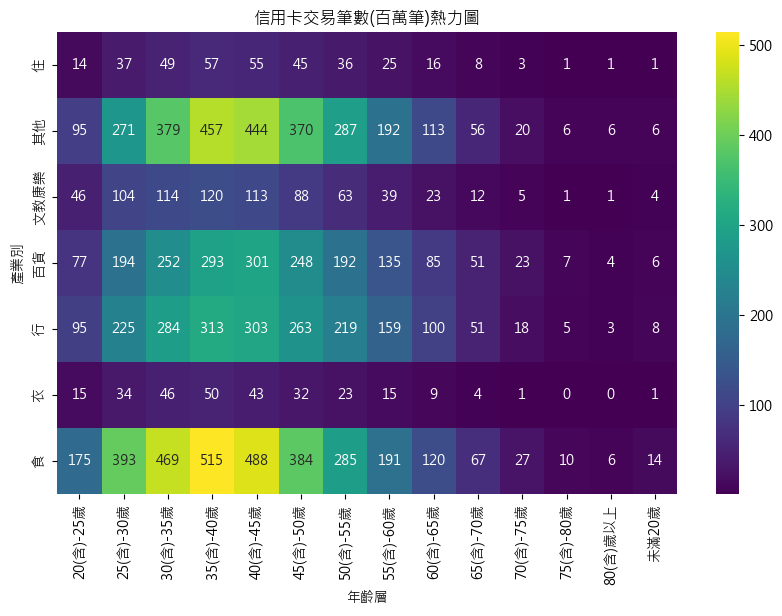

In [136]:

grouped_data = df.groupby(['產業別', '年齡層']).agg({'信用卡交易金額[新台幣]': 'sum', '信用卡交易筆數': 'sum'}).reset_index()


# 計算 '平均交易金額'
#grouped_data['平均交易金額'] = grouped_data['信用卡交易金額[新台幣]'] / grouped_data['信用卡交易筆數']

# 重新組織資料，使之符合你的格式
pivot_table_year = grouped_data.pivot_table(index='年齡層', columns='產業別', values='信用卡交易筆數', aggfunc='mean')

#  四捨五入並轉換為整數
#pivot_table_year = pivot_table_year.round().astype(int)


# 將 '年齡層' 移到列(index)
pivot_table_year.reset_index(inplace=True)

# 顯示結果
print(pivot_table_year)

plt.rcParams['font.family'] = 'Microsoft JhengHei'
plt.figure(figsize=(10, 6))
sns.heatmap(pivot_table_year.set_index('年齡層').T, cmap='viridis', annot=True, fmt=".0f")
plt.title('信用卡交易筆數(百萬筆)熱力圖')
plt.show()

產業別        年齡層     住     其他  文教康樂    百貨     行     衣     食
0    20(含)-25歲  2198   1553  1968  1260   592  1805   444
1    25(含)-30歲  2917   1980  2320  1571   735  2114   578
2    30(含)-35歲  3468   2280  2672  1733   845  2232   688
3    35(含)-40歲  3672   2618  3021  1807   939  2267   768
4    40(含)-45歲  4009   3098  3636  1830  1024  2417   837
5    45(含)-50歲  4496   3768  4670  1974  1095  2704   958
6    50(含)-55歲  4828   4522  5522  2141  1144  3055  1081
7    55(含)-60歲  5173   5380  6013  2203  1175  3394  1195
8    60(含)-65歲  5407   6478  6713  2211  1185  3574  1268
9    65(含)-70歲  5278   7883  7247  2055  1149  3607  1263
10   70(含)-75歲  4985   9233  7490  1941  1163  3782  1284
11   75(含)-80歲  5148  11036  8289  2050  1158  3952  1314
12    80(含)歲以上  5935   8625  7693  2232  1329  4201  1464
13       未滿20歲  2719   1186  1939  1424   569  1591   367


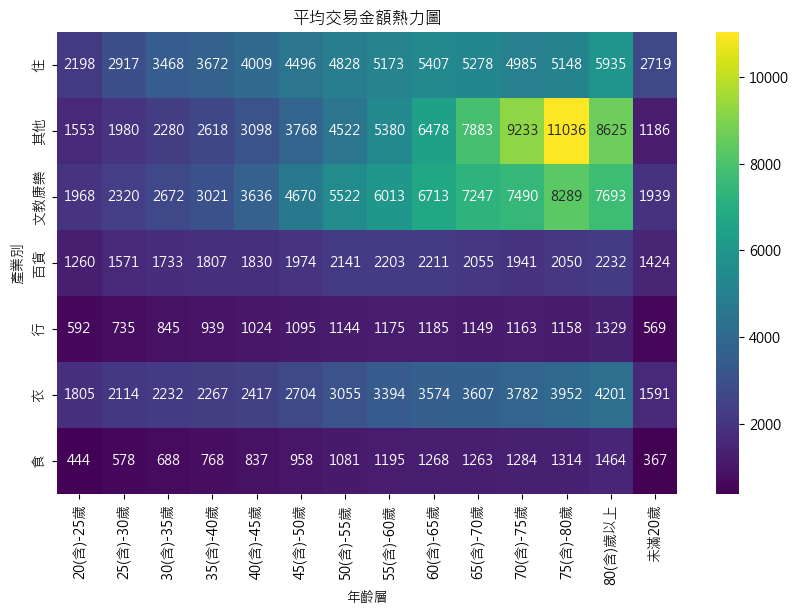

In [137]:
grouped_data = df.groupby(['產業別', '年齡層']).agg({'信用卡交易金額[新台幣]': 'sum', '信用卡交易筆數': 'sum'}).reset_index()


# 計算 '平均交易金額'
grouped_data['平均交易金額'] = grouped_data['信用卡交易金額[新台幣]'] / grouped_data['信用卡交易筆數']

# 重新組織資料，使之符合你的格式
pivot_table_year = grouped_data.pivot_table(index='年齡層', columns='產業別', values='平均交易金額', aggfunc='mean')

#  四捨五入並轉換為整數
pivot_table_year = pivot_table_year.round().astype(int)


# 將 '年齡層' 移到列(index)
pivot_table_year.reset_index(inplace=True)

# 顯示結果
print(pivot_table_year)

plt.rcParams['font.family'] = 'Microsoft JhengHei'
plt.figure(figsize=(10, 6))
sns.heatmap(pivot_table_year.set_index('年齡層').T, cmap='viridis', annot=True, fmt=".0f")
plt.title('平均交易金額熱力圖')
plt.show()

              信用卡交易筆數  信用卡交易金額[新台幣]
信用卡交易筆數       1.00000       0.68617
信用卡交易金額[新台幣]  0.68617       1.00000


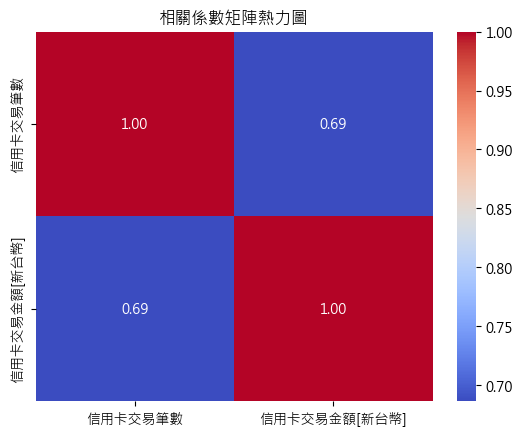

In [18]:
#XXXX

matplotlib.rc('font', family='Microsoft JhengHei')
selected_columns = ['信用卡交易筆數', '信用卡交易金額[新台幣]']
selected_data = df[selected_columns]
correlation_matrix = selected_data.corr()
print(correlation_matrix)
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('相關係數矩陣熱力圖')
plt.show()

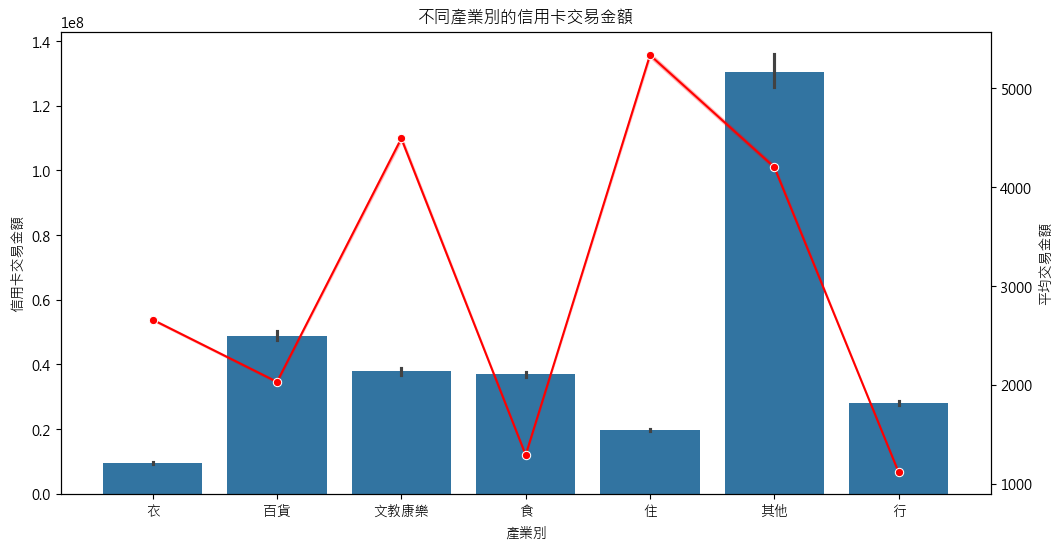

In [19]:
#依產業別分析(XXX)
matplotlib.rc('font', family='Microsoft JhengHei')
df['平均交易金額'] = df['信用卡交易金額[新台幣]'] / df['信用卡交易筆數']
plt.figure(figsize=(12, 6))
sns.barplot(x='產業別', y='信用卡交易金額[新台幣]', data=df)
plt.title('不同產業別的信用卡交易金額')
plt.xlabel('產業別')
plt.ylabel('信用卡交易金額')

ax2 = plt.twinx()
sns.lineplot(x='產業別', y='平均交易金額', data=df, color='red', marker='o', ax=ax2)
ax2.set_ylabel('平均交易金額')
plt.show()

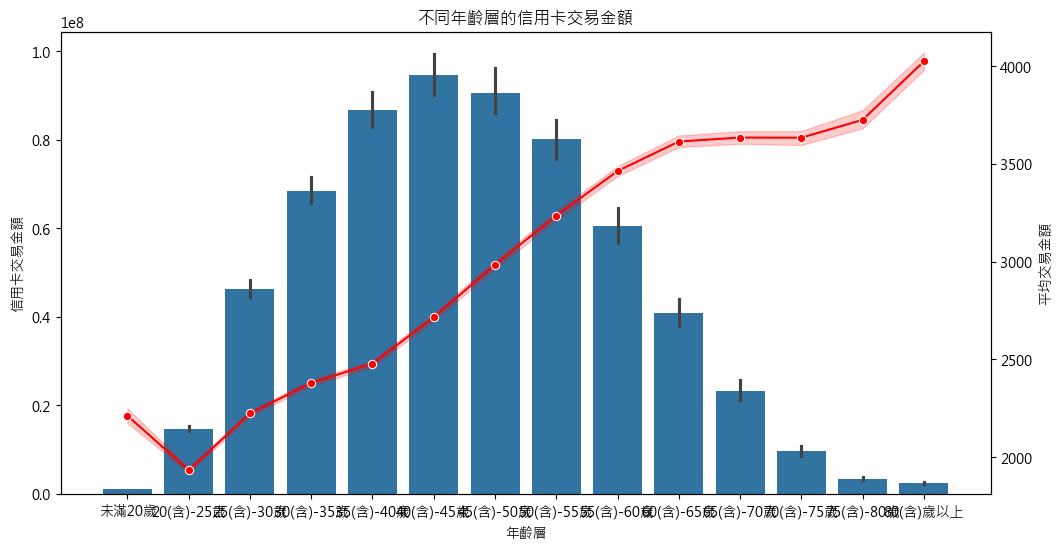

In [10]:
#依年齡層分析(XXX)
matplotlib.rc('font', family='Microsoft JhengHei')
df['平均交易金額'] = df['信用卡交易金額[新台幣]'] / df['信用卡交易筆數']
plt.figure(figsize=(12, 6))
sns.barplot(x='年齡層', y='信用卡交易金額[新台幣]', data=df)
plt.title('不同年齡層的信用卡交易金額')
plt.xlabel('年齡層')
plt.ylabel('信用卡交易金額')
ax2 = plt.twinx()
sns.lineplot(x='年齡層', y='平均交易金額', data=df, color='red', marker='o', ax=ax2)
ax2.set_ylabel('平均交易金額')
plt.show()


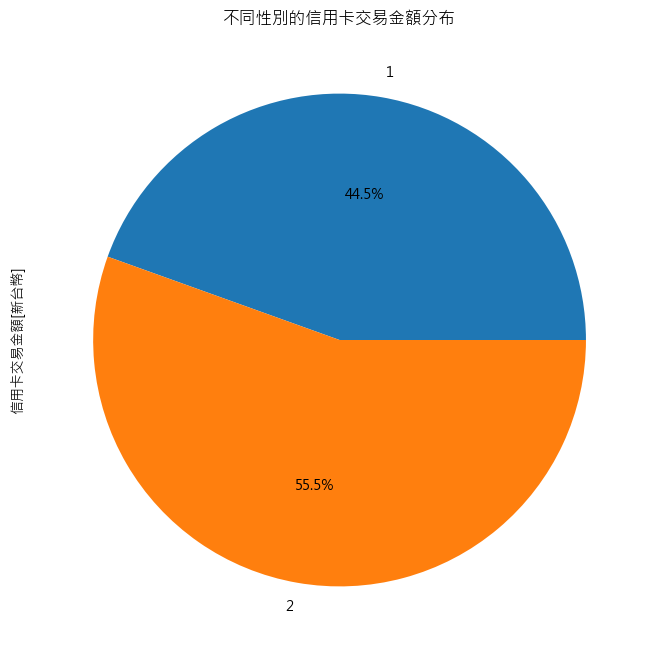

In [11]:
#依性別分析(XXX)
matplotlib.rc('font', family='Microsoft JhengHei')
plt.figure(figsize=(8, 8))
df.groupby('性別')['信用卡交易金額[新台幣]'].sum().plot.pie(autopct='%1.1f%%')
plt.title('不同性別的信用卡交易金額分布')
plt.show()

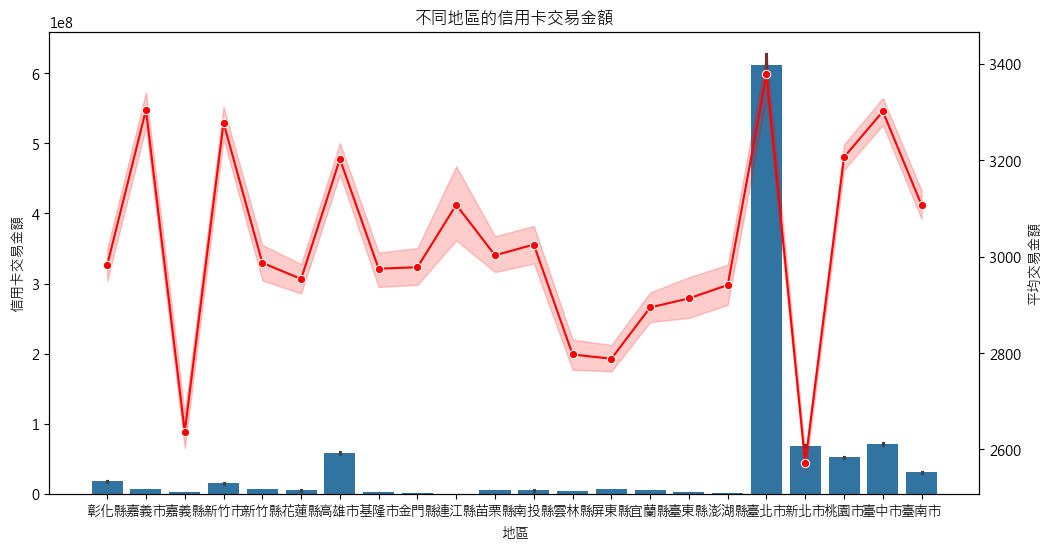

In [16]:
#依區域進行分析(XXX)
matplotlib.rc('font', family='Microsoft JhengHei')
df['平均交易金額'] = df['信用卡交易金額[新台幣]'] / df['信用卡交易筆數']
plt.figure(figsize=(12, 6))
sns.barplot(x='地區', y='信用卡交易金額[新台幣]', data=df)
plt.title('不同地區的信用卡交易金額')
plt.xlabel('地區')
plt.ylabel('信用卡交易金額')
ax2 = plt.twinx()
sns.lineplot(x='地區', y='平均交易金額', data=df, color='red', marker='o', ax=ax2)
ax2.set_ylabel('平均交易金額')
plt.show()

In [4]:
#截取六都及不含其他類別之資料

#六都
df_area6 = pd.read_csv('./six_cities.csv') 

#六都不含其他類 
df_area6n = df_area6[(df_area6['產業別'] != '其他')]   
df_area6n = df_area6n[['年', '月', '地區', '產業別', '性別', '年齡層', '信用卡交易筆數', '信用卡交易金額[新台幣]']]
a = df_area6n['信用卡交易金額[新台幣]'].sum()
x = df_area6['信用卡交易金額[新台幣]'].sum()
y = df['信用卡交易金額[新台幣]'].sum()
percentage_n = a / y/1000000
percentage = x / y/1000000
print(f'六都(不含其他類)佔總簽帳金額百分比: {percentage_n:.2%}')
print(f'六都佔總簽帳金額百分比: {percentage:.2%}')

print(df_area6n)

六都(不含其他類)佔總簽帳金額百分比: 0.00%
六都佔總簽帳金額百分比: 0.00%
           年  月   地區 產業別  性別        年齡層  信用卡交易筆數  信用卡交易金額[新台幣]
0       2014  1  臺北市   食  女性      未滿20歲     2819       2615745
1       2014  1  臺北市   食  女性  20(含)-25歲    66270      66794381
2       2014  1  臺北市   食  女性  25(含)-30歲   227091     263753101
3       2014  1  臺北市   食  女性  30(含)-35歲   396113     490378285
4       2014  1  臺北市   食  女性  35(含)-40歲   498370     618092602
...      ... ..  ...  ..  ..        ...      ...           ...
137587  2023  9  高雄市   行  男性  60(含)-65歲    50439     109126842
137588  2023  9  高雄市   行  男性  65(含)-70歲    31387      57677827
137589  2023  9  高雄市   行  男性  70(含)-75歲    16872      32315853
137590  2023  9  高雄市   行  男性  75(含)-80歲     4559      10076219
137591  2023  9  高雄市   行  男性   80(含)歲以上     1752       3201237

[117936 rows x 8 columns]


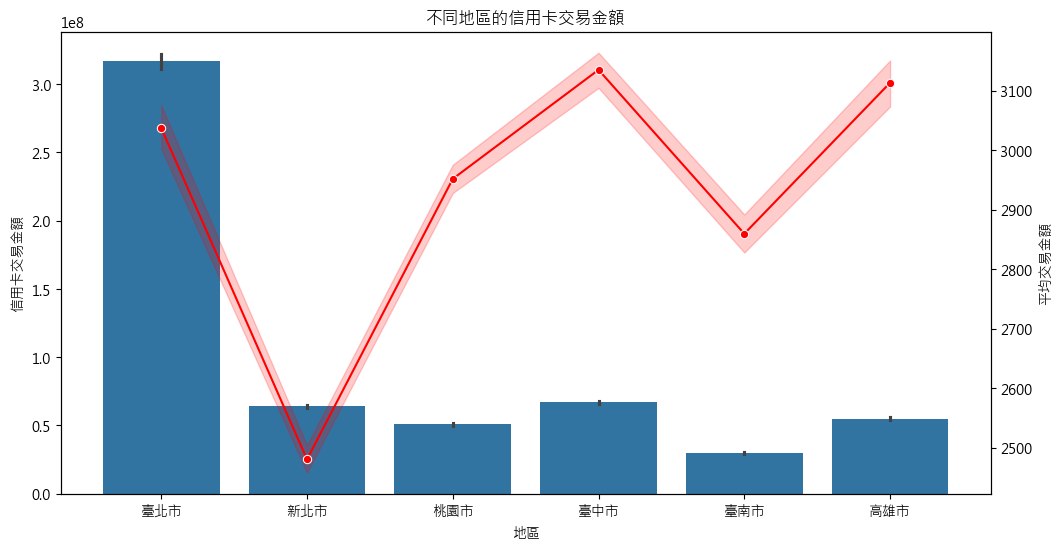

In [21]:
#六都(不含其他類)依區域進行分析
matplotlib.rc('font', family='Microsoft JhengHei')
df_area6n['平均交易金額'] = df_area6n['信用卡交易金額[新台幣]'] / df_area6n['信用卡交易筆數']
plt.figure(figsize=(12, 6))
sns.barplot(x='地區', y='信用卡交易金額[新台幣]', data=df_area6n)
plt.title('不同地區的信用卡交易金額')
plt.xlabel('地區')
plt.ylabel('信用卡交易金額')
ax2 = plt.twinx()
sns.lineplot(x='地區', y='平均交易金額', data=df_area6n,color='red', marker='o', ax=ax2)
ax2.set_ylabel('平均交易金額')
plt.show()

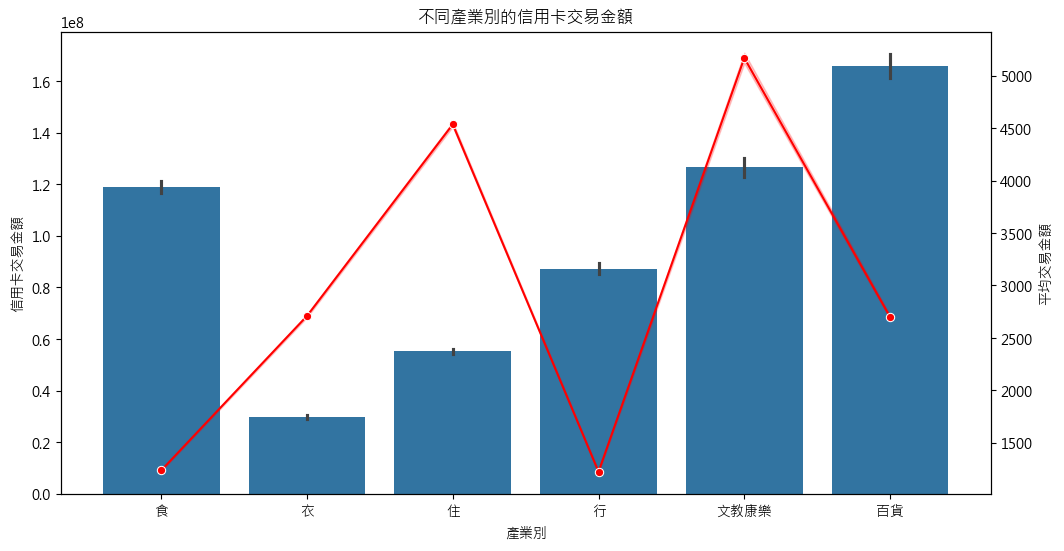

In [22]:
#六都(不含其他類)依產業別分析
matplotlib.rc('font', family='Microsoft JhengHei')
df_area6n['平均交易金額'] = df_area6n['信用卡交易金額[新台幣]'] / df_area6n['信用卡交易筆數']
plt.figure(figsize=(12, 6))
sns.barplot(x='產業別', y='信用卡交易金額[新台幣]', data=df_area6n)
plt.title('不同產業別的信用卡交易金額')
plt.xlabel('產業別')
plt.ylabel('信用卡交易金額')

ax2 = plt.twinx()
sns.lineplot(x='產業別', y='平均交易金額', data=df_area6n, color='red', marker='o', ax=ax2)
ax2.set_ylabel('平均交易金額')
plt.show()

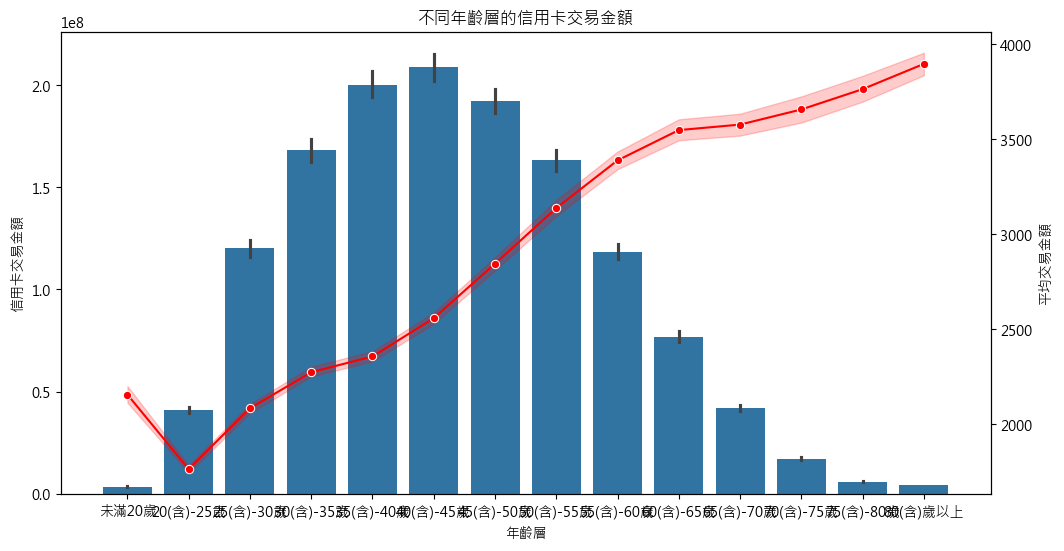

In [23]:
#依年齡層分析(六都不含其他類)
matplotlib.rc('font', family='Microsoft JhengHei')
df_area6n['平均交易金額'] = df_area6n['信用卡交易金額[新台幣]'] / df_area6n['信用卡交易筆數']
plt.figure(figsize=(12, 6))
sns.barplot(x='年齡層', y='信用卡交易金額[新台幣]', data=df_area6n)
plt.title('不同年齡層的信用卡交易金額')
plt.xlabel('年齡層')
plt.ylabel('信用卡交易金額')
ax2 = plt.twinx()
sns.lineplot(x='年齡層', y='平均交易金額', data=df_area6n, color='red', marker='o', ax=ax2)
ax2.set_ylabel('平均交易金額')
plt.show()


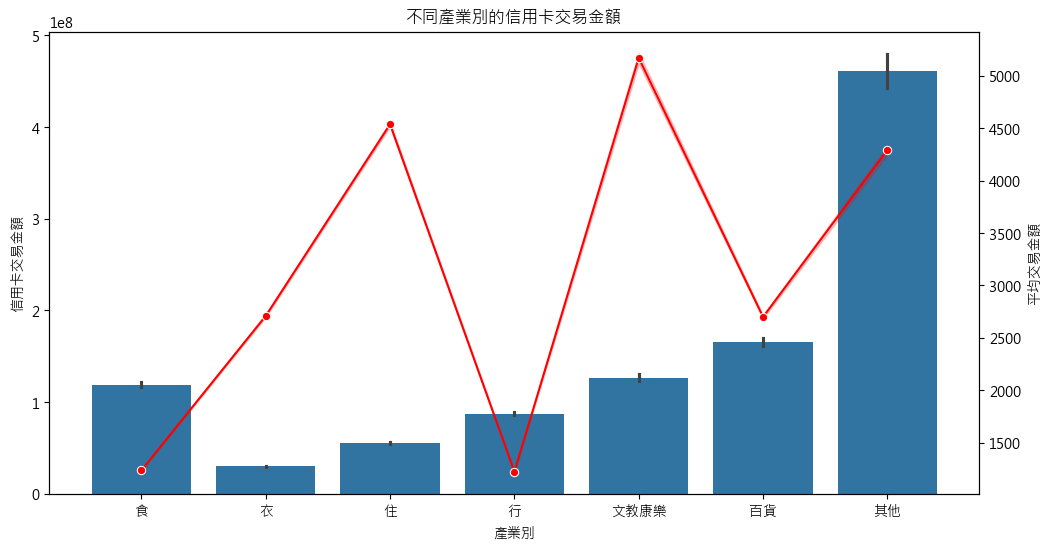

In [23]:
#六都依產業別分析
matplotlib.rc('font', family='Microsoft JhengHei')
df_area6['平均交易金額'] = df_area6['信用卡交易金額[新台幣]'] / df_area6['信用卡交易筆數']
plt.figure(figsize=(12, 6))
sns.barplot(x='產業別', y='信用卡交易金額[新台幣]', data=df_area6)
plt.title('不同產業別的信用卡交易金額')
plt.xlabel('產業別')
plt.ylabel('信用卡交易金額')

ax2 = plt.twinx()
sns.lineplot(x='產業別', y='平均交易金額', data=df_area6, color='red', marker='o', ax=ax2)
ax2.set_ylabel('平均交易金額')
plt.show()

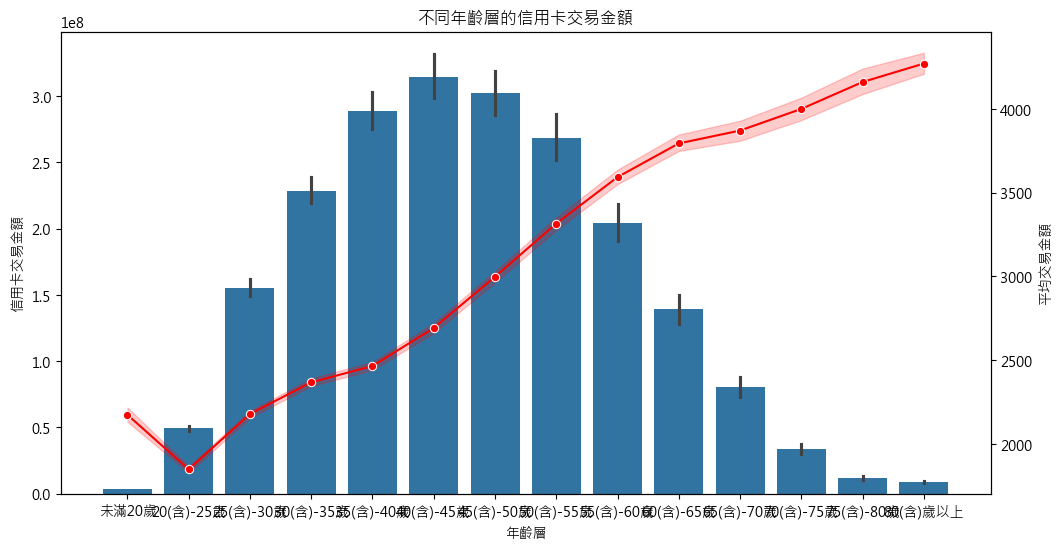

In [24]:
#六都依年齡層分析
matplotlib.rc('font', family='Microsoft JhengHei')
df_area6['平均交易金額'] = df_area6['信用卡交易金額[新台幣]'] / df_area6['信用卡交易筆數']
plt.figure(figsize=(12, 6))
sns.barplot(x='年齡層', y='信用卡交易金額[新台幣]', data=df_area6)
plt.title('不同年齡層的信用卡交易金額')
plt.xlabel('年齡層')
plt.ylabel('信用卡交易金額')
ax2 = plt.twinx()
sns.lineplot(x='年齡層', y='平均交易金額', data=df_area6, color='red', marker='o', ax=ax2)
ax2.set_ylabel('平均交易金額')
plt.show()


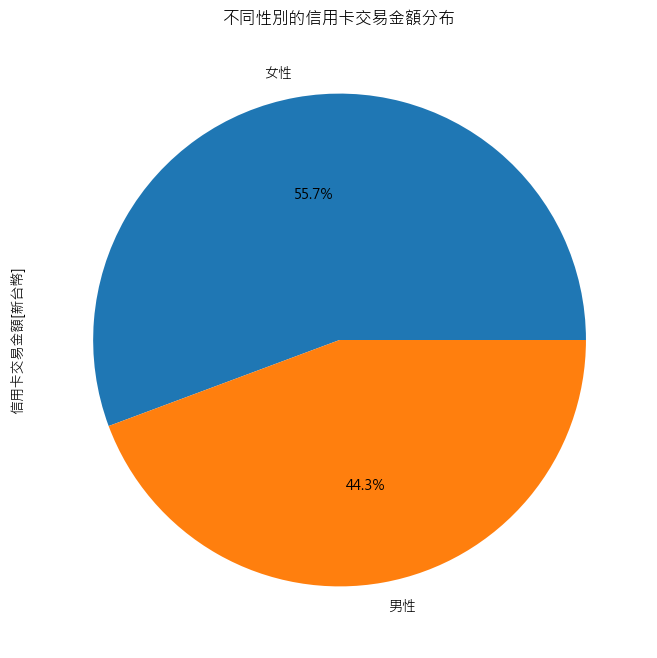

In [25]:
#六都依性別分析
matplotlib.rc('font', family='Microsoft JhengHei')
plt.figure(figsize=(8, 8))
df_area6.groupby('性別')['信用卡交易金額[新台幣]'].sum().plot.pie(autopct='%1.1f%%')
plt.title('不同性別的信用卡交易金額分布')
plt.show()

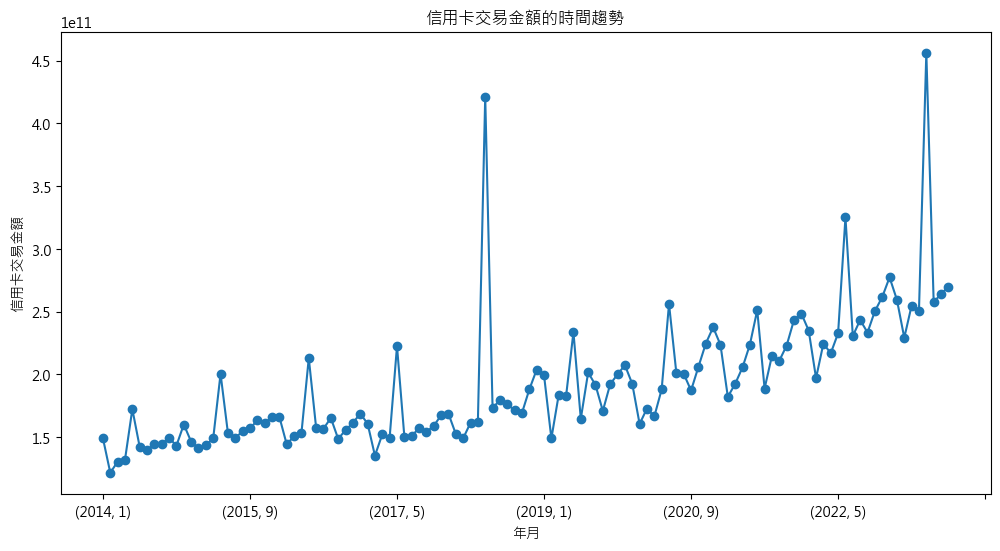

In [ ]:
matplotlib.rc('font', family='Microsoft JhengHei')
plt.figure(figsize=(12, 6))
df.groupby(['年', '月'])['信用卡交易金額[新台幣]'].sum().plot(marker='o')
plt.title('信用卡交易金額的時間趨勢')
plt.xlabel('年月')
plt.ylabel('信用卡交易金額')
plt.show()

C:\Users\isabe\AppData\Local\Temp\ipykernel_17472\2135203272.py:5: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='產業別', y='信用卡交易金額[新台幣]', hue='產業別', data=grouped_data, ci=None)
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


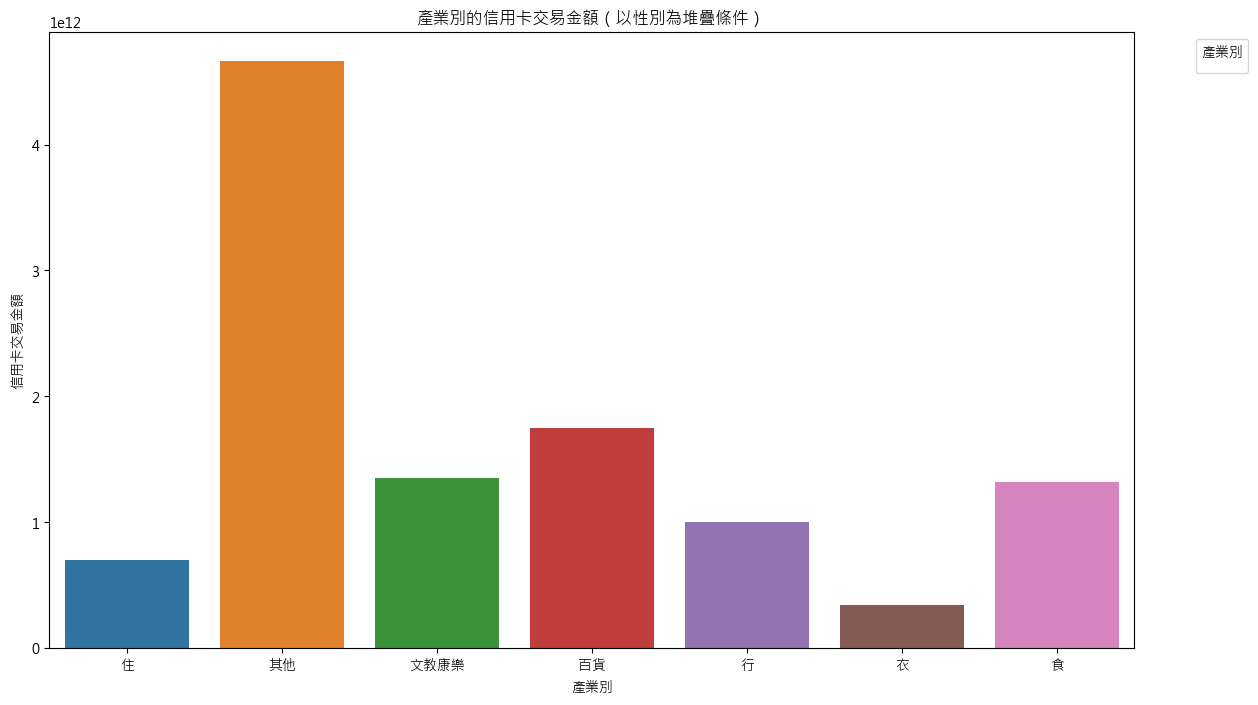

In [ ]:
matplotlib.rc('font', family='Microsoft JhengHei')
grouped_data = df.groupby(['性別', '產業別'])['信用卡交易金額[新台幣]'].sum().reset_index()

plt.figure(figsize=(14, 8))
sns.barplot(x='產業別', y='信用卡交易金額[新台幣]', hue='產業別', data=grouped_data, ci=None)
plt.title('產業別的信用卡交易金額（以性別為堆疊條件）')
plt.xlabel('產業別')
plt.ylabel('信用卡交易金額')
plt.legend(title='產業別', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

C:\Users\isabe\AppData\Local\Temp\ipykernel_17472\4066691068.py:5: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='產業別', y='信用卡交易金額[新台幣]', hue='性別', data=grouped_data, ci=None)


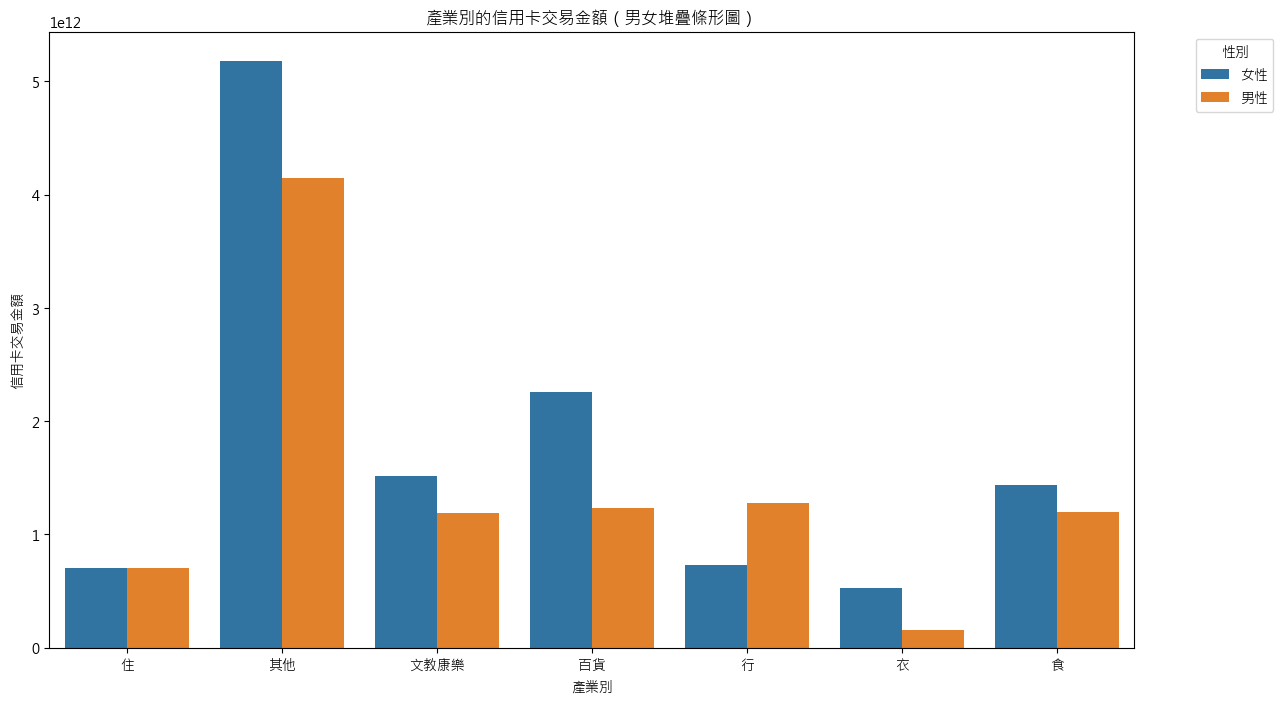

In [ ]:

grouped_data = df.groupby(['性別', '產業別'])['信用卡交易金額[新台幣]'].sum().reset_index()

# 使用堆疊圖，x='產業別'，y='信用卡交易金額[新台幣]'，hue='性別'
plt.figure(figsize=(14, 8))
sns.barplot(x='產業別', y='信用卡交易金額[新台幣]', hue='性別', data=grouped_data, ci=None)
plt.title('產業別的信用卡交易金額')
plt.xlabel('產業別')
plt.ylabel('信用卡交易金額')
plt.legend(title='性別', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

C:\Users\isabe\AppData\Local\Temp\ipykernel_17472\2675403776.py:5: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='產業別', y='信用卡交易金額[新台幣]', hue='性別', data=grouped_data, ci=None, palette={'男性': 'blue', '女性': 'orange'})


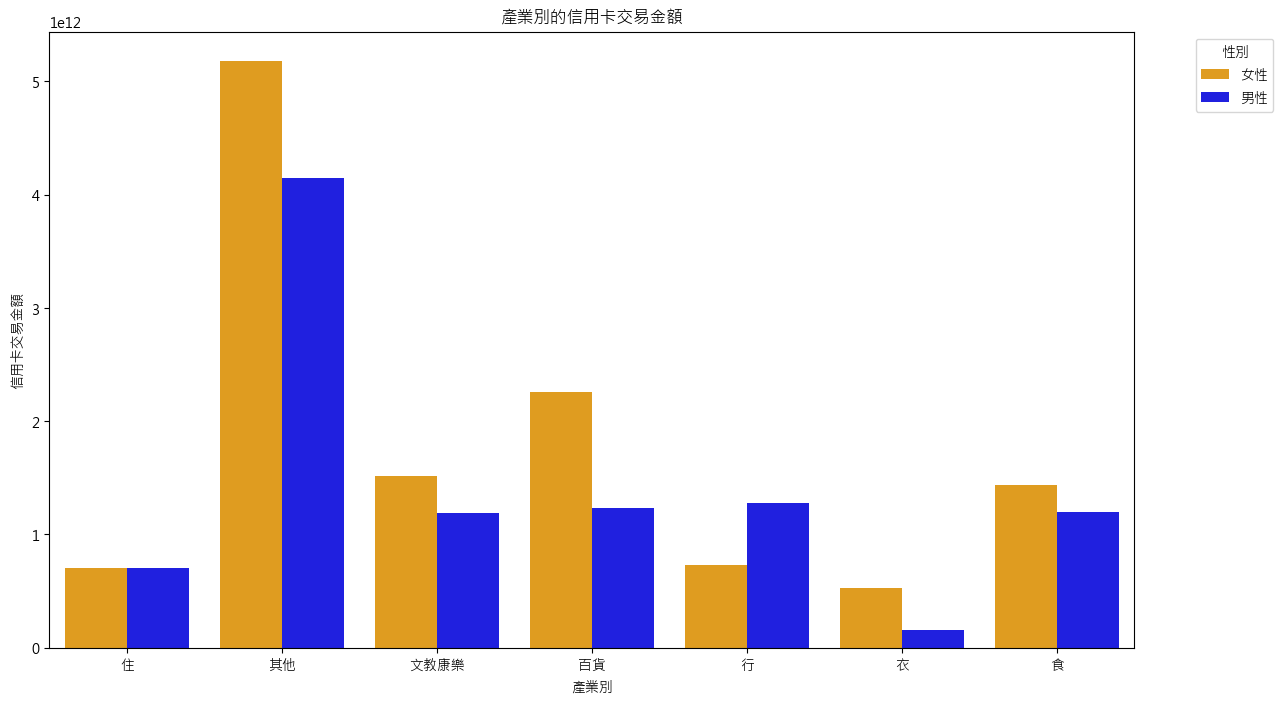

In [ ]:
grouped_data = df.groupby(['性別', '產業別'])['信用卡交易金額[新台幣]'].sum().reset_index()

# 繪製堆疊圖，使用不同顏色區分男女
plt.figure(figsize=(14, 8))
sns.barplot(x='產業別', y='信用卡交易金額[新台幣]', hue='性別', data=grouped_data, ci=None, palette={'男性': 'blue', '女性': 'orange'})
plt.title('產業別的信用卡交易金額')
plt.xlabel('產業別')
plt.ylabel('信用卡交易金額')
plt.legend(title='性別', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

C:\Users\isabe\AppData\Local\Temp\ipykernel_17472\3913188557.py:11: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='地區', y='信用卡交易金額[新台幣]', hue='產業別', data=filtered_data, ci=None)


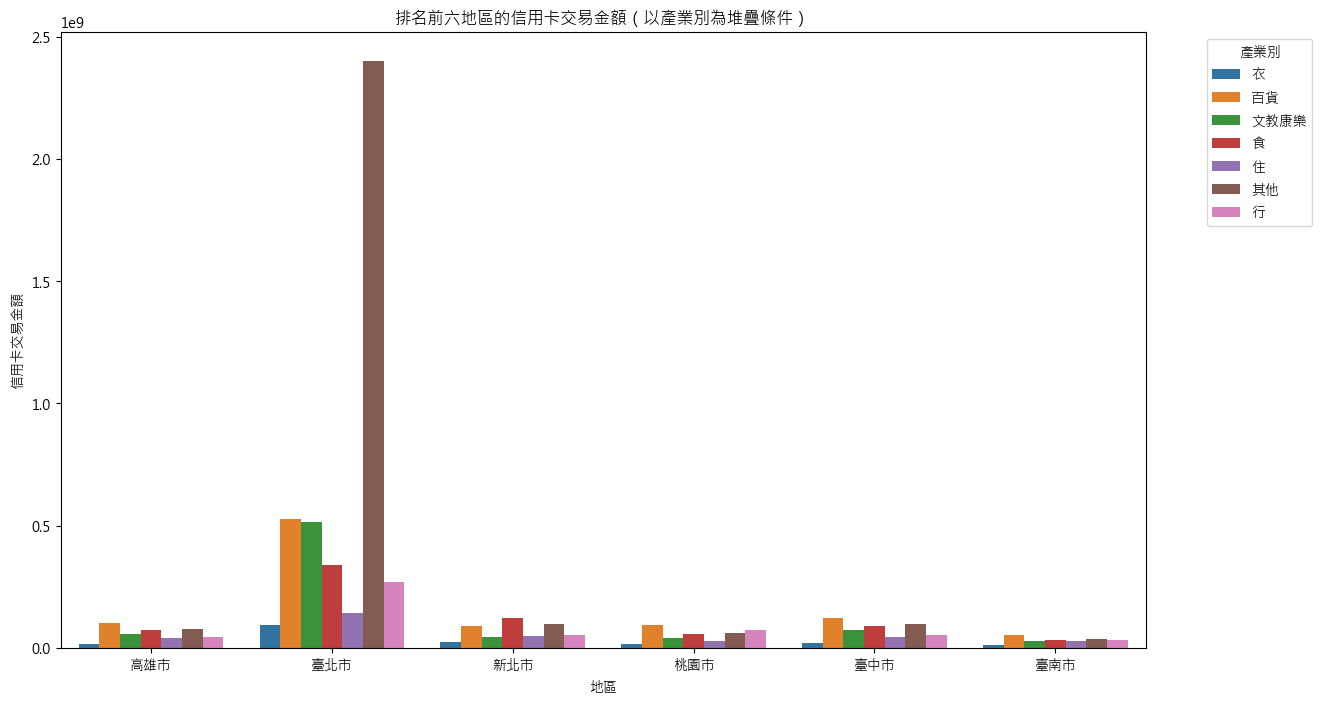

In [ ]:
region_total = df.groupby('地區')['信用卡交易金額[新台幣]'].sum().reset_index()

# 選擇排名前六的地區
top_regions = region_total.nlargest(6, '信用卡交易金額[新台幣]')['地區']

# 過濾原始資料，只保留排名前六的地區的資料
filtered_data = df[df['地區'].isin(top_regions)]

# 繪製堆疊圖，x='地區'，y='信用卡交易金額[新台幣]'，hue='產業別'，以性別堆疊
plt.figure(figsize=(14, 8))
sns.barplot(x='地區', y='信用卡交易金額[新台幣]', hue='產業別', data=filtered_data, ci=None)
plt.title('排名前六地區的信用卡交易金額（以產業別為堆疊條件）')
plt.xlabel('地區')
plt.ylabel('信用卡交易金額')
plt.legend(title='產業別', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

In [ ]:
grouped_data = df.groupby(['性別', '地區', '產業別'])['信用卡交易金額[新台幣]'].sum().reset_index()

# 繪製堆疊圖
plt.figure(figsize=(14, 8))
sns.barplot(x='地區', y='信用卡交易金額[新台幣]', hue='產業別', data=grouped_data, ci=None)
plt.title('不同地區、產業別的信用卡交易金額（以性別為堆疊條件）')
plt.xlabel('地區')
plt.ylabel('信用卡交易金額')
plt.legend(title='產業別', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

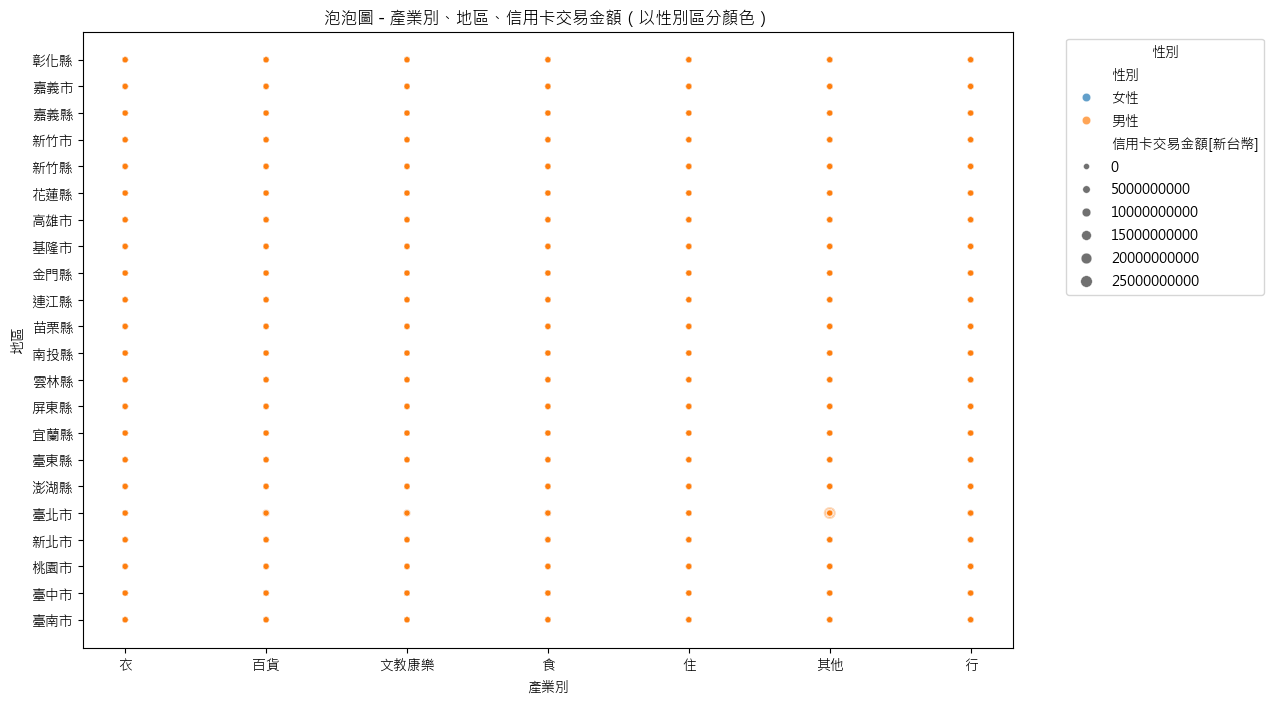

In [ ]:
plt.rcParams['font.family'] = 'Microsoft JhengHei'
selected_columns = ['產業別', '地區', '信用卡交易金額[新台幣]', '性別']
selected_data = df[selected_columns]
plt.figure(figsize=(12, 8))
sns.scatterplot(x='產業別', y='地區', size='信用卡交易金額[新台幣]', hue='性別', data=selected_data, alpha=0.7)
plt.title('泡泡圖 - 產業別、地區、信用卡交易金額（以性別區分顏色）')
plt.xlabel('產業別')
plt.ylabel('地區')
plt.legend(title='性別', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

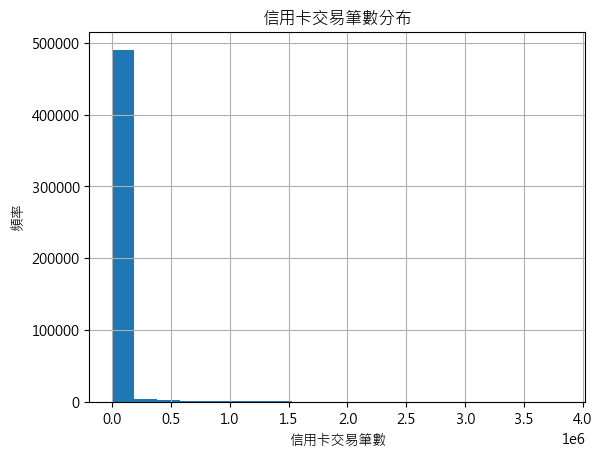

In [ ]:
df['信用卡交易筆數'].hist(bins=20)
plt.title('信用卡交易筆數分布')
plt.xlabel('信用卡交易筆數')
plt.ylabel('頻率')
plt.show()

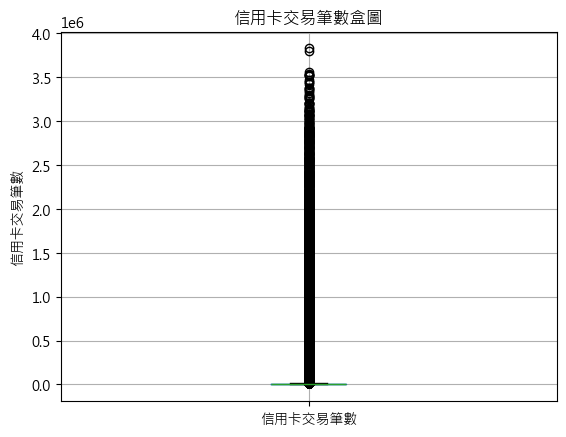

In [ ]:
df.boxplot(column='信用卡交易筆數')
plt.title('信用卡交易筆數盒圖')
plt.ylabel('信用卡交易筆數')
plt.show()

In [5]:
#六都不含其他類
df_area6n

年  月   地區 產業別  性別        年齡層  信用卡交易筆數  信用卡交易金額[新台幣]
0       2014  1  臺北市   食  女性      未滿20歲     2819       2615745
1       2014  1  臺北市   食  女性  20(含)-25歲    66270      66794381
2       2014  1  臺北市   食  女性  25(含)-30歲   227091     263753101
3       2014  1  臺北市   食  女性  30(含)-35歲   396113     490378285
4       2014  1  臺北市   食  女性  35(含)-40歲   498370     618092602
...      ... ..  ...  ..  ..        ...      ...           ...
137587  2023  9  高雄市   行  男性  60(含)-65歲    50439     109126842
137588  2023  9  高雄市   行  男性  65(含)-70歲    31387      57677827
137589  2023  9  高雄市   行  男性  70(含)-75歲    16872      32315853
137590  2023  9  高雄市   行  男性  75(含)-80歲     4559      10076219
137591  2023  9  高雄市   行  男性   80(含)歲以上     1752       3201237

[117936 rows x 8 columns]

年         年齡層  2014  2015  2016  2017  2018  2019  2020  2021  2022  2023
0   20(含)-25歲  1686  1653  1495  1496  1388  1205   950   687   624   608
1   25(含)-30歲  1842  1794  1662  1670  1589  1423  1111   859   824   801
2   30(含)-35歲  1956  1870  1742  1794  1737  1569  1228   983   948   923
3   35(含)-40歲  2036  1933  1791  1870  1821  1653  1293  1092  1049  1013
4   40(含)-45歲  2174  2078  1923  2025  1997  1833  1411  1222  1161  1135
5   45(含)-50歲  2366  2252  2081  2203  2183  2051  1585  1403  1332  1330
6   50(含)-55歲  2505  2391  2206  2351  2333  2227  1709  1565  1525  1548
7   55(含)-60歲  2594  2480  2279  2439  2409  2326  1742  1645  1644  1708
8   60(含)-65歲  2599  2491  2286  2484  2477  2411  1759  1712  1739  1845
9   65(含)-70歲  2632  2536  2316  2497  2459  2427  1709  1689  1752  1910
10  70(含)-75歲  2682  2566  2365  2551  2521  2493  1751  1734  1784  1928
11  75(含)-80歲  2701  2603  2416  2564  2584  2571  1799  1761  1819  2015
12   80(含)歲以上  3117  3051  2794  2953 

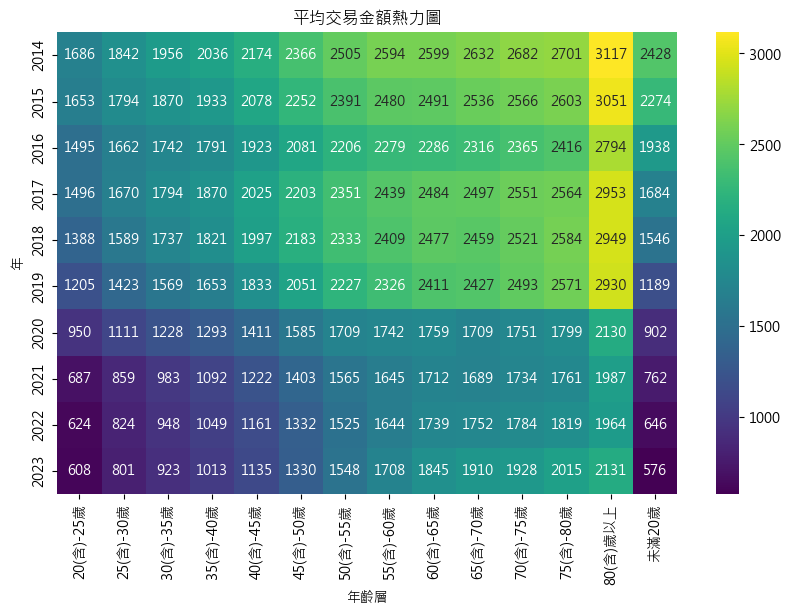

In [148]:

grouped_data = df_area6n.groupby(['年', '年齡層']).agg({'信用卡交易金額[新台幣]': 'sum', '信用卡交易筆數': 'sum'}).reset_index()

# 計算 '平均交易金額'
grouped_data['平均交易金額'] = grouped_data['信用卡交易金額[新台幣]'] / grouped_data['信用卡交易筆數']

# 重新組織資料，使之符合你的格式
pivot_table_year = grouped_data.pivot_table(index='年齡層', columns='年', values='平均交易金額', aggfunc='mean')

# 將 '平均交易金額' 四捨五入並轉換為整數
pivot_table_year = pivot_table_year.round().astype(int)

# 將 '年齡層' 移到列(index)
pivot_table_year.reset_index(inplace=True)

# 顯示結果
print(pivot_table_year)

plt.rcParams['font.family'] = 'Microsoft JhengHei'
plt.figure(figsize=(10, 6))
sns.heatmap(pivot_table_year.set_index('年齡層').T, cmap='viridis', annot=True, fmt=".0f")
plt.title('平均交易金額熱力圖')
plt.show()



年         年齡層           2014           2015           2016           2017  \
0   20(含)-25歲   18003.712808   20666.470240   22932.456288   24680.846902   
1   25(含)-30歲   65106.861975   68405.154374   74674.787032   75294.887633   
2   30(含)-35歲  115435.440327  117458.244168  121024.035312  111808.761104   
3   35(含)-40歲  133683.916012  139991.480259  147716.153840  141934.385793   
4   40(含)-45歲  132267.084101  136144.433172  144402.772216  143459.442412   
5   45(含)-50歲  128574.559158  133975.172595  142376.623519  139823.286094   
6   50(含)-55歲  104613.420103  111587.076578  120258.543059  120777.191577   
7   55(含)-60歲   73963.894009   78778.019065   84111.231459   86926.255664   
8   60(含)-65歲   45429.514130   50766.916854   55169.333126   58204.229930   
9   65(含)-70歲   17706.157086   22144.528536   26668.949173   31190.121320   
10  70(含)-75歲    7120.346421    7908.833001    8422.938171    9869.545890   
11  75(含)-80歲    2802.327940    3285.686110    3703.489318    4173.148606   

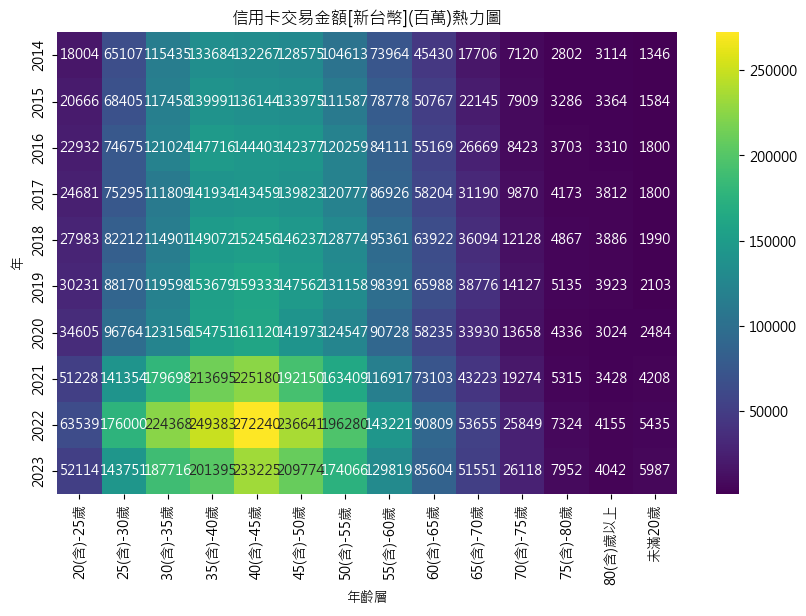

In [150]:
#六都不含其他類
df_area6n['信用卡交易金額[新台幣]'] = df_area6n['信用卡交易金額[新台幣]']/1000000
df_area6n['信用卡交易筆數'] = df_area6n['信用卡交易筆數']/1000000



grouped_data = df_area6n.groupby(['年', '年齡層']).agg({'信用卡交易金額[新台幣]': 'sum', '信用卡交易筆數': 'sum'}).reset_index()

# 計算 '平均交易金額'
#grouped_data['平均交易金額'] = grouped_data['信用卡交易金額[新台幣]'] / grouped_data['信用卡交易筆數']

# 重新組織資料，使之符合你的格式
pivot_table_year = grouped_data.pivot_table(index='年齡層', columns='年', values='信用卡交易金額[新台幣]', aggfunc='mean')

# 將 '平均交易金額' 四捨五入並轉換為整數
#pivot_table_year = pivot_table_year.round().astype(int)

# 將 '年齡層' 移到列(index)
pivot_table_year.reset_index(inplace=True)

# 顯示結果
print(pivot_table_year)

plt.rcParams['font.family'] = 'Microsoft JhengHei'
plt.figure(figsize=(10, 6))
sns.heatmap(pivot_table_year.set_index('年齡層').T, cmap='viridis', annot=True, fmt=".0f")
plt.title('信用卡交易金額[新台幣](百萬)熱力圖')
plt.show()


年         年齡層       2014       2015       2016       2017       2018  \
0   20(含)-25歲  10.677869  12.503728  15.342199  16.495758  20.167666   
1   25(含)-30歲  35.350280  38.136496  44.940557  45.080139  51.723664   
2   30(含)-35歲  59.009960  62.808987  69.480279  62.309206  66.146184   
3   35(含)-40歲  65.643983  72.404496  82.469417  75.907268  81.884283   
4   40(含)-45歲  60.846231  65.505564  75.075105  70.859850  76.343654   
5   45(含)-50歲  54.338941  59.503357  68.422828  63.475322  66.976363   
6   50(含)-55歲  41.757271  46.675978  54.509464  51.365576  55.191179   
7   55(含)-60歲  28.509882  31.760909  36.902943  35.643422  39.584873   
8   60(含)-65歲  17.478560  20.380430  24.128872  23.433373  25.807402   
9   65(含)-70歲   6.727534   8.730703  11.514315  12.489964  14.675795   
10  70(含)-75歲   2.655294   3.082606   3.561984   3.868707   4.810112   
11  75(含)-80歲   1.037483   1.262269   1.532910   1.627413   1.883529   
12   80(含)歲以上   0.998965   1.102373   1.184712   1.290966   1.31

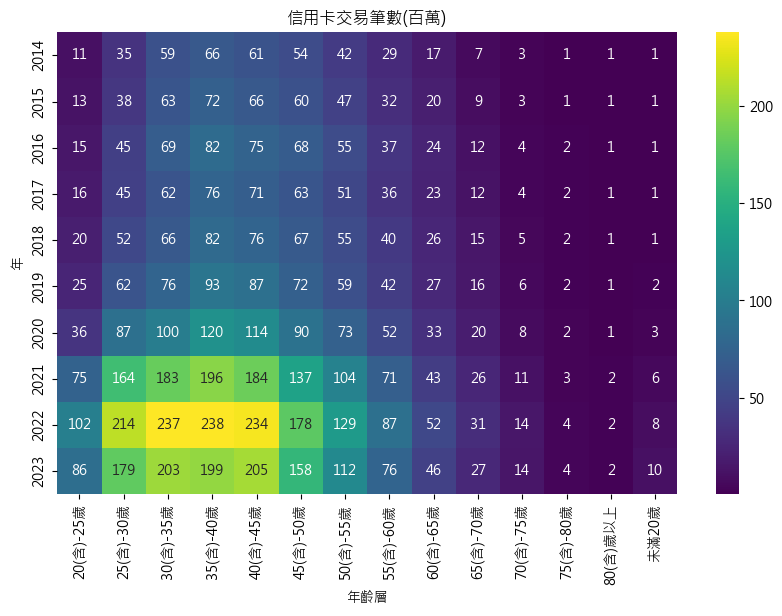

In [151]:
#六都不含其他類
grouped_data = df_area6n.groupby(['年', '年齡層']).agg({'信用卡交易金額[新台幣]': 'sum', '信用卡交易筆數': 'sum'}).reset_index()

# 計算 '平均交易金額'
#grouped_data['平均交易金額'] = grouped_data['信用卡交易金額[新台幣]'] / grouped_data['信用卡交易筆數']

# 重新組織資料，使之符合你的格式
pivot_table_year = grouped_data.pivot_table(index='年齡層', columns='年', values='信用卡交易筆數', aggfunc='mean')

# 將 '平均交易金額' 四捨五入並轉換為整數
#pivot_table_year = pivot_table_year.round().astype(int)

# 將 '年齡層' 移到列(index)
pivot_table_year.reset_index(inplace=True)

# 顯示結果
print(pivot_table_year)

plt.rcParams['font.family'] = 'Microsoft JhengHei'
plt.figure(figsize=(10, 6))
sns.heatmap(pivot_table_year.set_index('年齡層').T, cmap='viridis', annot=True, fmt=".0f")
plt.title('信用卡交易筆數(百萬)')
plt.show()


產業別        年齡層     住  文教康樂    百貨     行     衣     食
0    20(含)-25歲  2022  1943  1240   581  1783   422
1    25(含)-30歲  2722  2297  1551   722  2096   547
2    30(含)-35歲  3272  2654  1719   831  2218   652
3    35(含)-40歲  3444  3012  1800   924  2258   730
4    40(含)-45歲  3721  3644  1822  1010  2410   797
5    45(含)-50歲  4197  4728  1972  1086  2704   921
6    50(含)-55歲  4558  5636  2155  1139  3063  1049
7    55(含)-60歲  4924  6164  2228  1174  3425  1173
8    60(含)-65歲  5189  6935  2249  1189  3624  1259
9    65(含)-70歲  5091  7524  2098  1161  3671  1267
10   70(含)-75歲  4800  7779  1985  1179  3875  1294
11   75(含)-80歲  4972  8630  2094  1182  4067  1327
12    80(含)歲以上  5566  7820  2285  1359  4277  1478
13       未滿20歲  2339  1895  1424   560  1574   349


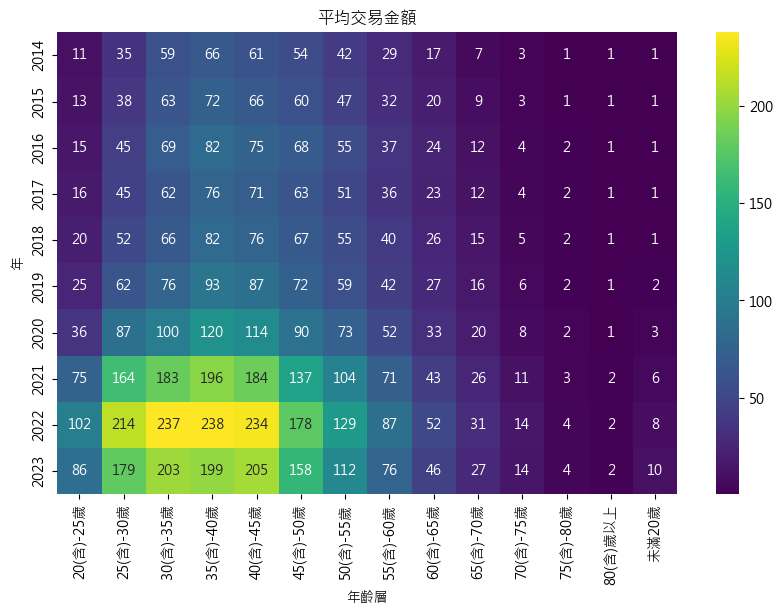

In [155]:
grouped_data = df_area6n.groupby(['年齡層', '產業別']).agg({'信用卡交易金額[新台幣]': 'sum', '信用卡交易筆數': 'sum'}).reset_index()

# 計算 '平均交易金額'
grouped_data['平均交易金額'] = grouped_data['信用卡交易金額[新台幣]'] / grouped_data['信用卡交易筆數']

pivot_table_industry = grouped_data.pivot_table(index='年齡層', columns='產業別', values='平均交易金額', aggfunc='mean')

# 將 '平均交易金額' 四捨五入並轉換為整數
pivot_table_industry = pivot_table_industry.round().astype(int)

# 將 '年齡層' 移到列(index)
pivot_table_industry.reset_index(inplace=True)

# 顯示結果
print(pivot_table_industry)

plt.rcParams['font.family'] = 'Microsoft JhengHei'
plt.figure(figsize=(10, 6))
sns.heatmap(pivot_table_year.set_index('年齡層').T, cmap='viridis', annot=True, fmt=".0f")
plt.title('平均交易金額')
plt.show()



產業別        年齡層              住           文教康樂             百貨              行  \
0    20(含)-25歲   25460.430667   85158.648454   89872.206233   50390.562164   
1    25(含)-30歲   87635.012859  224223.152223  284063.223262  145150.268526   
2    30(含)-35歲  137862.031010  283779.260246  408166.104258  206398.544674   
3    35(含)-40歲  163095.849518  331874.042738  494427.294420  249107.718705   
4    40(含)-45歲  166083.488079  373934.655475  512961.516353  262609.788522   
5    45(含)-50歲  150472.494881  375995.440664  455843.395261  243335.646494   
6    50(含)-55歲  130261.163048  319203.194254  384555.103400  212983.674523   
7    55(含)-60歲   99358.045972  216116.177525  278288.193599  160467.053128   
8    60(含)-65歲   66286.535599  139169.778365  176858.915570  102735.826353   
9    65(含)-70歲   35693.240109   79004.156536   98709.629829   51209.080556   
10   70(含)-75歲   13837.331133   31862.450419   43042.419351   18444.007134   
11   75(含)-80歲    4932.467627   11472.304131   13647.605898    5

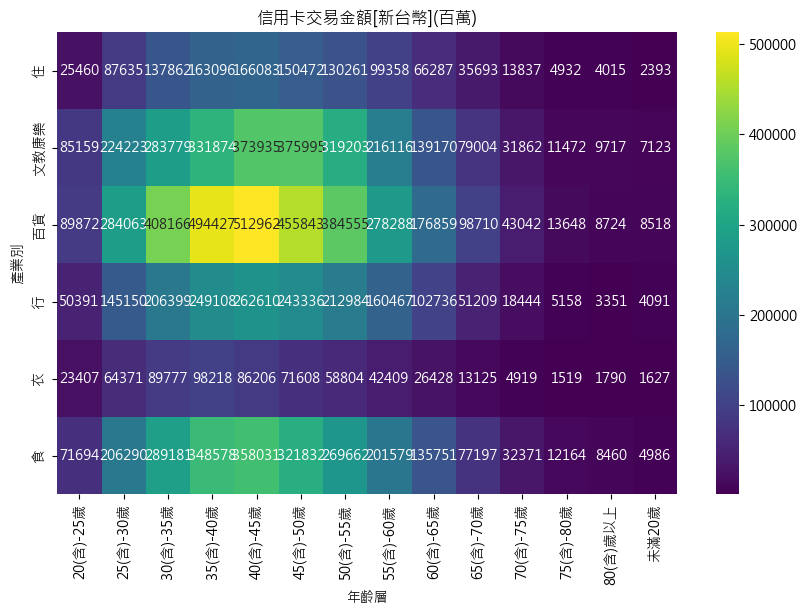

In [158]:
grouped_data = df_area6n.groupby(['年齡層', '產業別']).agg({'信用卡交易金額[新台幣]': 'sum', '信用卡交易筆數': 'sum'}).reset_index()

# 計算 '平均交易金額'
#grouped_data['平均交易金額'] = grouped_data['信用卡交易金額[新台幣]'] / grouped_data['信用卡交易筆數']

pivot_table_industry = grouped_data.pivot_table(index='年齡層', columns='產業別', values='信用卡交易金額[新台幣]', aggfunc='mean')

# 將 '平均交易金額' 四捨五入並轉換為整數
#pivot_table_industry = pivot_table_industry.round().astype(int)

# 將 '年齡層' 移到列(index)
pivot_table_industry.reset_index(inplace=True)

# 顯示結果
print(pivot_table_industry)

plt.rcParams['font.family'] = 'Microsoft JhengHei'
plt.figure(figsize=(10, 6))
sns.heatmap(pivot_table_industry.set_index('年齡層').T, cmap='viridis', annot=True, fmt=".0f")
plt.title('信用卡交易金額[新台幣](百萬)')
plt.show()

產業別        年齡層          住        文教康樂          百貨           行          衣  \
0    20(含)-25歲  12.591111   43.831193   72.506121   86.683947  13.128856   
1    25(含)-30歲  32.194260   97.621462  183.177595  201.148814  30.706170   
2    30(含)-35歲  42.132506  106.909594  237.419820  248.461351  40.483029   
3    35(含)-40歲  47.360831  110.177449  274.749442  269.694643  43.506908   
4    40(含)-45歲  44.629214  102.620173  281.558993  260.005707  35.766007   
5    45(含)-50歲  35.849957   79.521960  231.126078  224.062752  26.482268   
6    50(含)-55歲  28.580860   56.637056  178.433774  186.940803  19.201109   
7    55(含)-60歲  20.177595   35.058498  124.895480  136.690714  12.380678   
8    60(含)-65歲  12.773614   20.067482   78.649469   86.434951   7.291474   
9    65(含)-70歲   7.011300   10.499711   47.044023   44.099786   3.575027   
10   70(含)-75歲   2.882978    4.095707   21.685783   15.639915   1.269303   
11   75(含)-80歲   0.991999    1.329309    6.517861    4.362853   0.373412   
12    80(含)歲

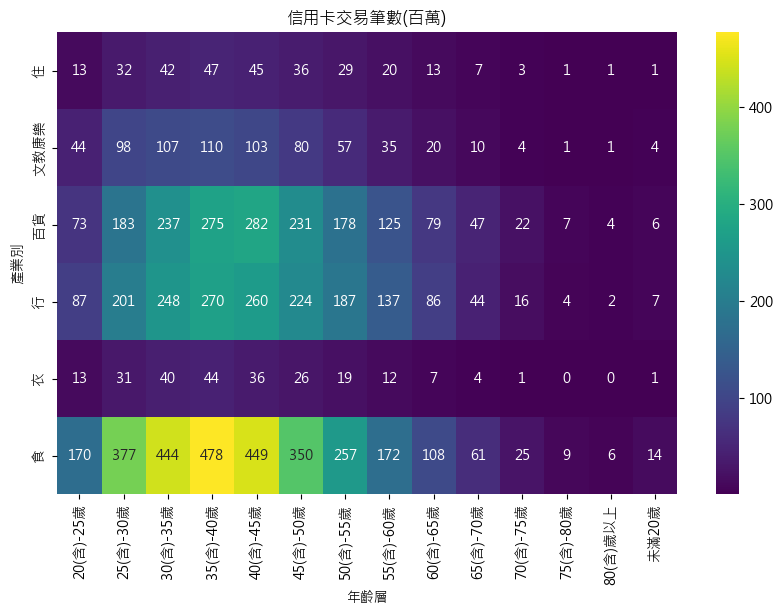

In [159]:
grouped_data = df_area6n.groupby(['年齡層', '產業別']).agg({'信用卡交易金額[新台幣]': 'sum', '信用卡交易筆數': 'sum'}).reset_index()

# 計算 '平均交易金額'
#grouped_data['平均交易金額'] = grouped_data['信用卡交易金額[新台幣]'] / grouped_data['信用卡交易筆數']

pivot_table_industry = grouped_data.pivot_table(index='年齡層', columns='產業別', values='信用卡交易筆數', aggfunc='mean')

# 將 '平均交易金額' 四捨五入並轉換為整數
#pivot_table_industry = pivot_table_industry.round().astype(int)

# 將 '年齡層' 移到列(index)
pivot_table_industry.reset_index(inplace=True)

# 顯示結果
print(pivot_table_industry)

plt.rcParams['font.family'] = 'Microsoft JhengHei'
plt.figure(figsize=(10, 6))
sns.heatmap(pivot_table_industry.set_index('年齡層').T, cmap='viridis', annot=True, fmt=".0f")
plt.title('信用卡交易筆數(百萬)')
plt.show()

地區        年齡層   新北市   桃園市   臺中市   臺北市   臺南市   高雄市
0   20(含)-25歲   618  1398  1401   764  1227  1387
1   25(含)-30歲   799  1705  1763   960  1576  1725
2   30(含)-35歲   959  1844  1952  1114  1736  1854
3   35(含)-40歲  1106  1919  1998  1223  1788  1873
4   40(含)-45歲  1243  2038  2120  1335  1874  1966
5   45(含)-50歲  1395  2229  2289  1556  1999  2128
6   50(含)-55歲  1514  2389  2418  1763  2125  2240
7   55(含)-60歲  1593  2459  2502  1883  2188  2291
8   60(含)-65歲  1657  2461  2534  2000  2185  2285
9   65(含)-70歲  1620  2365  2384  2059  2069  2132
10  70(含)-75歲  1595  2322  2299  2106  1968  2058
11  75(含)-80歲  1664  2363  2300  2255  2037  2063
12   80(含)歲以上  1880  2764  2670  2597  2410  2581
13      未滿20歲  1162  1201  1207   705  1103  1239


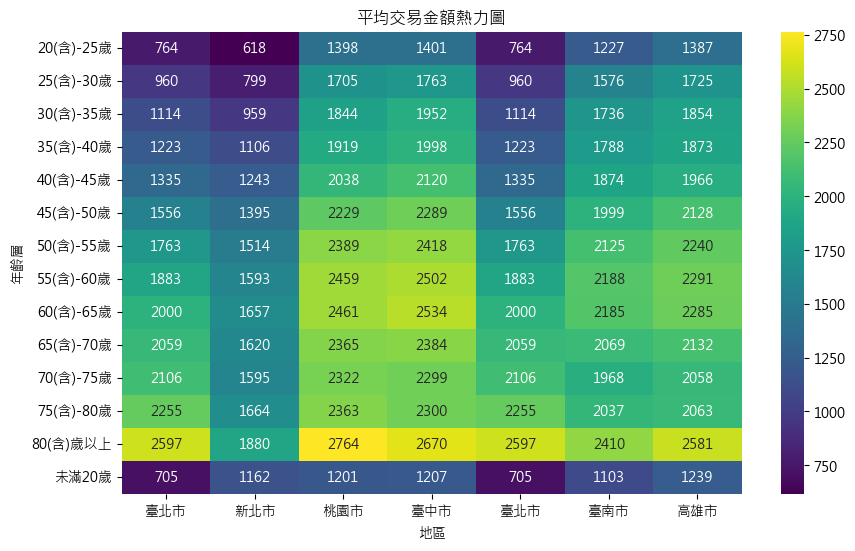

In [152]:
#六都不含其他類
grouped_data = df_area6n.groupby(['年齡層', '地區']).agg({'信用卡交易金額[新台幣]': 'sum', '信用卡交易筆數': 'sum'}).reset_index()

# 計算 '平均交易金額'
grouped_data['平均交易金額'] = grouped_data['信用卡交易金額[新台幣]'] / grouped_data['信用卡交易筆數']


pivot_table_industry = grouped_data.pivot_table(index='年齡層', columns='地區', values='平均交易金額', aggfunc='mean')

# 將 '平均交易金額' 四捨五入並轉換為整數
pivot_table_industry = pivot_table_industry.round().astype(int)

# 將 '年齡層' 移到列(index)
pivot_table_industry.reset_index(inplace=True)

# 顯示結果
print(pivot_table_industry)

plt.rcParams['font.family'] = 'Microsoft JhengHei'
plt.figure(figsize=(10, 6))
sns.heatmap(pivot_table_industry.set_index('年齡層')[['臺北市', '新北市', '桃園市', '臺中市', '臺北市', '臺南市','高雄市']], cmap='viridis', annot=True, fmt=".0f")
plt.title('平均交易金額熱力圖')
plt.show()

地區        年齡層            新北市            桃園市            臺中市            臺北市  \
0   20(含)-25歲   34898.397474   26031.306521   40115.346845  198510.904089   
1   25(含)-30歲  101395.559658   81787.784653  118028.291785  574705.082337   
2   30(含)-35歲  146574.093454  118955.269176  162230.230456  790773.895180   
3   35(含)-40歲  183411.934793  149339.967315  190712.714356  921365.496644   
4   40(含)-45歲  197851.511668  159294.859808  200179.308209  947487.157199   
5   45(含)-50歲  177562.565312  148116.783453  189380.004942  861654.489741   
6   50(含)-55歲  151691.449300  125854.995684  163499.380523  724100.684829   
7   55(含)-60歲  113987.300771   89700.036897  117111.772245  521790.986215   
8   60(含)-65歲   75538.610702   54731.719260   72074.971837  344172.897947   
9   65(含)-70歲   42351.268306   27484.391573   37039.992370  195278.257900   
10  70(含)-75歲   17392.941144   10156.500064   14061.274732   82585.843388   
11  75(含)-80歲    5579.338261    3049.784423    4494.984407   29288.338649   

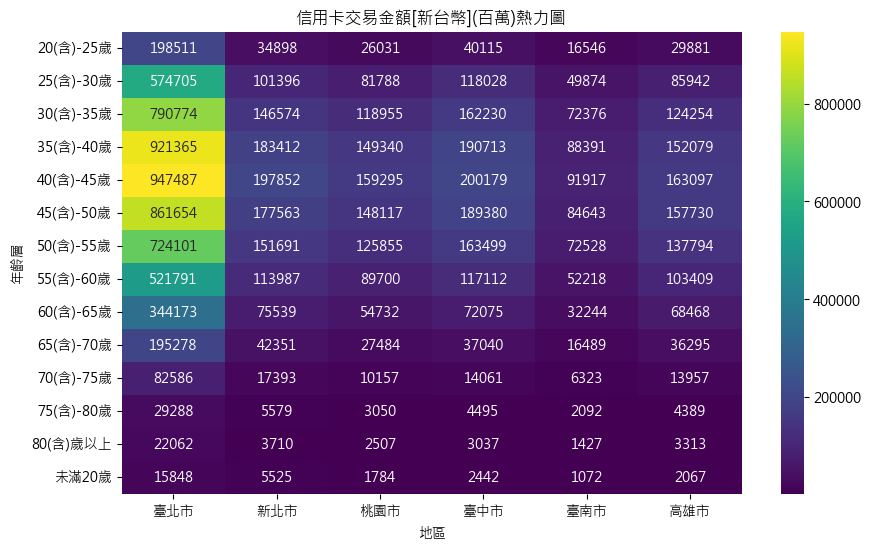

In [160]:
#六都不含其他類
grouped_data = df_area6n.groupby(['年齡層', '地區']).agg({'信用卡交易金額[新台幣]': 'sum', '信用卡交易筆數': 'sum'}).reset_index()

# 計算 '平均交易金額'
#grouped_data['平均交易金額'] = grouped_data['信用卡交易金額[新台幣]'] / grouped_data['信用卡交易筆數']


pivot_table_area = grouped_data.pivot_table(index='年齡層', columns='地區', values='信用卡交易金額[新台幣]', aggfunc='mean')

# 將 '平均交易金額' 四捨五入並轉換為整數
#pivot_table_area = pivot_table_area.round().astype(int)

# 將 '年齡層' 移到列(index)
pivot_table_area.reset_index(inplace=True)

# 顯示結果
print(pivot_table_area)

plt.rcParams['font.family'] = 'Microsoft JhengHei'
plt.figure(figsize=(10, 6))
sns.heatmap(pivot_table_area.set_index('年齡層')[['臺北市', '新北市', '桃園市', '臺中市', '臺南市','高雄市']], cmap='viridis', annot=True, fmt=".0f")
plt.title('信用卡交易金額[新台幣](百萬)熱力圖')
plt.show()

地區        年齡層         新北市        桃園市        臺中市         臺北市        臺南市  \
0   20(含)-25歲   56.482554  18.621381  28.628394  259.943262  13.486225   
1   25(含)-30歲  126.955339  47.978267  66.931173  598.382934  31.648242   
2   30(含)-35歲  152.777254  64.508716  83.121285  710.048833  41.700946   
3   35(含)-40歲  165.801805  77.840820  95.456505  753.263149  49.444194   
4   40(含)-45歲  159.136454  78.174476  94.432414  709.982349  49.060497   
5   45(含)-50歲  127.312895  66.449069  82.726889  553.663740  42.345570   
6   50(含)-55歲  100.189409  52.676613  67.608085  410.688378  34.136174   
7   55(含)-60歲   71.550333  36.480744  46.804519  277.169044  23.864303   
8   60(含)-65歲   45.585552  22.243670  28.439980  172.044834  14.756684   
9   65(含)-70歲   26.144760  11.623709  15.537759   94.859120   7.970872   
10  70(含)-75歲   10.904585   4.374860   6.114995   39.207883   3.212204   
11  75(含)-80歲    3.352443   1.290880   1.954203   12.989573   1.027179   
12   80(含)歲以上    1.973099   0.906875  

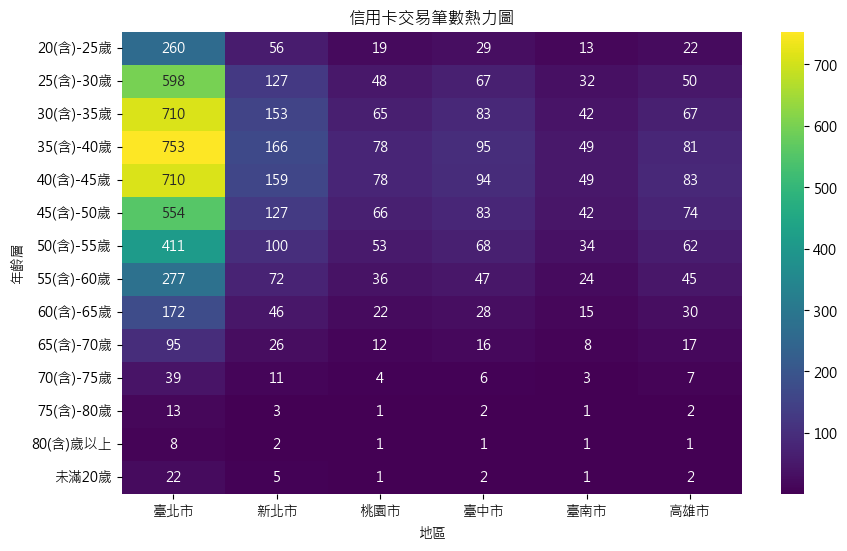

In [161]:
#六都不含其他類
grouped_data = df_area6n.groupby(['年齡層', '地區']).agg({'信用卡交易金額[新台幣]': 'sum', '信用卡交易筆數': 'sum'}).reset_index()

# 計算 '平均交易金額'
#grouped_data['平均交易金額'] = grouped_data['信用卡交易金額[新台幣]'] / grouped_data['信用卡交易筆數']


pivot_table_area = grouped_data.pivot_table(index='年齡層', columns='地區', values='信用卡交易筆數', aggfunc='mean')

# 將 '平均交易金額' 四捨五入並轉換為整數
#pivot_table_area = pivot_table_area.round().astype(int)

# 將 '年齡層' 移到列(index)
pivot_table_area.reset_index(inplace=True)

# 顯示結果
print(pivot_table_area)

plt.rcParams['font.family'] = 'Microsoft JhengHei'
plt.figure(figsize=(10, 6))
sns.heatmap(pivot_table_area.set_index('年齡層')[['臺北市', '新北市', '桃園市', '臺中市', '臺南市','高雄市']], cmap='viridis', annot=True, fmt=".0f")
plt.title('信用卡交易筆數熱力圖')
plt.show()

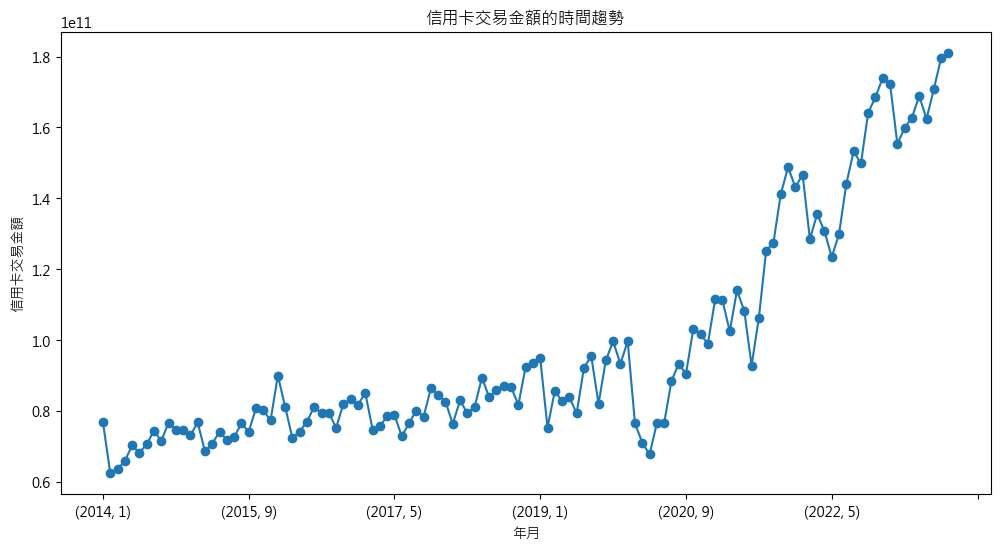

In [6]:
matplotlib.rc('font', family='Microsoft JhengHei')
plt.figure(figsize=(12, 6))
df_area6n.groupby(['年', '月'])['信用卡交易金額[新台幣]'].sum().plot(marker='o')
plt.title('信用卡交易金額的時間趨勢')
plt.xlabel('年月')
plt.ylabel('信用卡交易金額')
plt.show()

In [ ]:
plt.rcParams['font.family'] = 'Microsoft JhengHei'

# Your existing code
plt.figure(figsize=(12, 6))
df_area6n['年月'] = pd.to_datetime(df_area6n['年'].astype(str) + df_area6n['月'].astype(str), format='%Y%m')
df_grouped = df_area6n.groupby(df_area6n['年月'].dt.year)['信用卡交易金額[新台幣]'].sum()
df_grouped.plot(marker='o')

# Add trendline
z = np.polyfit(df_grouped.index, df_grouped.values, 1)  # Fit a first-degree polynomial (linear regression)
p = np.poly1d(z)
plt.plot(df_grouped.index, p(df_grouped.index), 'r--', label='Trendline')

# Customize x-axis and y-axis
plt.title('信用卡交易金額的時間趨勢')
plt.xlabel('年度')
plt.ylabel('信用卡交易金額')

plt.legend()  # Show legend with the trendline

slope = z[0]
intercept = z[1]
plt.text(2010, p(2010), f'斜率: {slope:.2f}', fontsize=12, color='blue')


plt.show()

In [6]:
#標籤編碼法--批次轉換所有非數值特徵值
cols = df_area6n.select_dtypes(exclude=[np.number]).columns
cols

Index(['地區', '產業別', '性別', '年齡層'], dtype='object')

In [8]:
from sklearn.preprocessing import LabelEncoder
df_area6n = LabelEncoder
for i in cols:
    unique_values = df_area6n[i].unique()
    if len(unique_values) > 1:
        df_area6n[i] = label1.fit_transform(df_area6n[i])
        print('{} 特徵對照:'.format(i), end='')
        for j in range(len(label1.classes_)):
            print('{} - {}'.format(j, label1.classes_[j]), end=', ')
        print()
    else:
        print('{} 特徵只有單一值，無法進行標籤編碼。'.format(i))

ModuleNotFoundError: No module named 'sklearn'

In [36]:
#標籤編碼法
from sklearn.preprocessing import LabelEncoder


label1 = LabelEncoder()
for i in cols:
    df_area6n[i] = label1.fit_transform(df_area6n[i])
    print('{}特徵對照:'.format(i),end='')
    for j in range(len(label1.classes_)):
        print('{} - {}'.format(j,label1.classes_[j],end=','))
    print()
    df_area6n



地區特徵對照:0 - 0
1 - 1
2 - 2
3 - 3
4 - 4
5 - 5

產業別特徵對照:0 - 0
1 - 1
2 - 2
3 - 3
4 - 4
5 - 5

性別特徵對照:0 - 0
1 - 1

年齡層特徵對照:0 - 0
1 - 1
2 - 2
3 - 3
4 - 4
5 - 5
6 - 6
7 - 7
8 - 8
9 - 9
10 - 10
11 - 11
12 - 12
13 - 13



In [38]:
#進行卡方驗證
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

data = df_area6n.iloc[:, :-1]
data

年  月  地區  產業別  性別  年齡層  信用卡交易筆數  信用卡交易金額[新台幣]
0       2014  1   3    5   0   13     2819       2615745
1       2014  1   3    5   0    0    66270      66794381
2       2014  1   3    5   0    1   227091     263753101
3       2014  1   3    5   0    2   396113     490378285
4       2014  1   3    5   0    3   498370     618092602
...      ... ..  ..  ...  ..  ...      ...           ...
137587  2023  9   5    3   1    8    50439     109126842
137588  2023  9   5    3   1    9    31387      57677827
137589  2023  9   5    3   1   10    16872      32315853
137590  2023  9   5    3   1   11     4559      10076219
137591  2023  9   5    3   1   12     1752       3201237

[117936 rows x 8 columns]

In [42]:
target = df_area6n.iloc[:, -1]
target

0          927.898191
1         1007.912796
2         1161.442334
3         1237.975742
4         1240.228348
             ...     
137587    2163.540950
137588    1837.634275
137589    1915.354018
137590    2210.181838
137591    1827.190068
Name: 平均交易金額, Length: 117936, dtype: float64

In [51]:
has_negative = (df_area6n < 0).any().any()

if has_negative:
    print("DataFrame 中有負值。")
else:
    print("DataFrame 中沒有負值。")

DataFrame 中有負值。


In [52]:
negative_values = df_area6n[df_area6n < 0].dropna()
print(negative_values)

Empty DataFrame
Columns: [年, 月, 地區, 產業別, 性別, 年齡層, 信用卡交易筆數, 信用卡交易金額[新台幣], 平均交易金額]
Index: []


In [49]:
df_area6n.to_csv('data.csv')

In [53]:
negative_values = df_area6n[df_area6n < 0]

# 列出 DataFrame 中的負值
print("DataFrame 中的負值：")
print(negative_values)

DataFrame 中的負值：
         年   月  地區  產業別  性別  年齡層  信用卡交易筆數  信用卡交易金額[新台幣]  平均交易金額
0      NaN NaN NaN  NaN NaN  NaN      NaN           NaN     NaN
1      NaN NaN NaN  NaN NaN  NaN      NaN           NaN     NaN
2      NaN NaN NaN  NaN NaN  NaN      NaN           NaN     NaN
3      NaN NaN NaN  NaN NaN  NaN      NaN           NaN     NaN
4      NaN NaN NaN  NaN NaN  NaN      NaN           NaN     NaN
...     ..  ..  ..  ...  ..  ...      ...           ...     ...
137587 NaN NaN NaN  NaN NaN  NaN      NaN           NaN     NaN
137588 NaN NaN NaN  NaN NaN  NaN      NaN           NaN     NaN
137589 NaN NaN NaN  NaN NaN  NaN      NaN           NaN     NaN
137590 NaN NaN NaN  NaN NaN  NaN      NaN           NaN     NaN
137591 NaN NaN NaN  NaN NaN  NaN      NaN           NaN     NaN

[117936 rows x 9 columns]


In [54]:
negative_values = df_area6n[df_area6n < 0].dropna()
print(negative_values)

Empty DataFrame
Columns: [年, 月, 地區, 產業別, 性別, 年齡層, 信用卡交易筆數, 信用卡交易金額[新台幣], 平均交易金額]
Index: []


In [43]:
print("data 的行數：", data.shape[0])
print("target 的行數：", target.shape[0])

data 的行數： 117936
target 的行數： 117936


In [55]:
from sklearn.feature_selection import SelectKBest, mutual_info_classif

# 假設 n 是你要選擇的特徵數
n = 4
mi = SelectKBest(mutual_info_classif, k=n)
arr_mi = mi.fit_transform(data, target)

ValueError: Unknown label type: continuous. Maybe you are trying to fit a classifier, which expects discrete classes on a regression target with continuous values.

In [44]:
n = 5
chi = SelectKBest(chi2, k=n)
arrchi = chi.fit_transform(data, target)
arrchi

ValueError: Input X must be non-negative.

In [57]:
label1.classes_


array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13],
      dtype=int64)

In [60]:

print(df_area6n)

           年  月   地區 產業別  性別        年齡層  信用卡交易筆數  信用卡交易金額[新台幣]
0       2014  1  臺北市   食  女性      未滿20歲     2819       2615745
1       2014  1  臺北市   食  女性  20(含)-25歲    66270      66794381
2       2014  1  臺北市   食  女性  25(含)-30歲   227091     263753101
3       2014  1  臺北市   食  女性  30(含)-35歲   396113     490378285
4       2014  1  臺北市   食  女性  35(含)-40歲   498370     618092602
...      ... ..  ...  ..  ..        ...      ...           ...
137587  2023  9  高雄市   行  男性  60(含)-65歲    50439     109126842
137588  2023  9  高雄市   行  男性  65(含)-70歲    31387      57677827
137589  2023  9  高雄市   行  男性  70(含)-75歲    16872      32315853
137590  2023  9  高雄市   行  男性  75(含)-80歲     4559      10076219
137591  2023  9  高雄市   行  男性   80(含)歲以上     1752       3201237

[117936 rows x 8 columns]


In [52]:
df_area6n

NameError: name 'df_area6n' is not defined

In [ ]:
#標籤編碼法--批次轉換所有非數值特徵值
from sklearn.preprocessing import LabelEncoder
label1 = LabelEncoder()


cols = df_area6n.select_dtypes(exclude=[np.number]).columns
cols

In [ ]:
#標籤編碼法

for i in cols:
    df_area6n[i] = label1.fit_transform(df_area6n[i])
    print('{}特徵對照:'.format(i),end='')
    for j in range(len(label1.classes_)):
        print('{} - {}'.format(j,label1.classes_[j],end=','))
    print()
df_area6n
    


In [51]:
#皮爾森相關係數
#皮爾森相關係數
featuresCorr = df_area6n.corr()
print(featuresCorr)

targetCorr = featuresCorr['信用卡交易金額[新台幣]']
targetCorr = targetCorr.drop('信用卡交易金額[新台幣]')
selectedFeatures = targetCorr[abs(targetCorr)>0.4]
print("選擇特徵數:{}\n選擇特徵:\n{}".format(len(selectedFeatures),selectedFeatures))


NameError: name 'df_area6n' is not defined

In [11]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import pandas as pd

levels = ['性別', '年齡層', '產業別', '地區']
color_columns = ['信用卡交易筆數', '信用卡交易金額[新台幣]']
value_column = '信用卡交易金額[新台幣]'

def build_hierarchical_dataframe(df_area6, levels, value_column, color_columns=None):
    df_all_trees = pd.DataFrame(columns=['id', 'parent', 'value', 'color'])

    for i in range(len(levels) - 1):
        dfg = df_area6.groupby(levels[i:]).agg({value_column: 'sum', color_columns[0]: 'sum', color_columns[1]: 'sum'}).reset_index()
        df_tree = pd.DataFrame({
            'id': dfg[levels[i]],
            'parent': dfg[levels[i + 1]],
            'value': dfg[value_column],
            'color': dfg[color_columns[0]] / dfg[color_columns[1]]
        })
        df_all_trees = pd.concat([df_all_trees, df_tree], ignore_index=True)

    total = pd.Series({
        'id': 'total',
        'parent': '',
        'value': df_area6[value_column].sum(),
        'color': df_area6[color_columns[0]].sum() / df_area6[color_columns[1]].sum()
    })

    df_all_trees = pd.concat([df_all_trees, pd.DataFrame([total])], ignore_index=True)

    return df_all_trees

df_all_trees = build_hierarchical_dataframe(df_area6n, levels, value_column, color_columns)
average_score = df_area6n['信用卡交易金額[新台幣]'].sum() / df_area6n['信用卡交易筆數'].sum()

fig = make_subplots(1, 2, specs=[[{"type": "domain"}, {"type": "domain"}]],)

fig.add_trace(go.Sunburst(
    labels=df_all_trees['id'],
    parents=df_all_trees['parent'],
    values=df_all_trees['value'],
    branchvalues='total',
    marker=dict(
        colors=df_all_trees['color'],
        colorscale='RdBu',
        cmid=average_score),
    hovertemplate='<b>%{label} </b> <br> 信用卡交易金額: %{value}<br> 成功率: %{color:.2f}',
    name=''
), 1, 1)

fig.add_trace(go.Sunburst(
    labels=df_all_trees['id'],
    parents=df_all_trees['parent'],
    values=df_all_trees['value'],
    branchvalues='total',
    marker=dict(
        colors=df_all_trees['color'],
        colorscale='RdBu',
        cmid=average_score),
    hovertemplate='<b>%{label} </b> <br> 信用卡交易金額: %{value}<br> 成功率: %{color:.2f}',
    maxdepth=2
), 1, 2)

fig.update_layout(margin=dict(t=10, b=10, r=10, l=10))
fig.show()

C:\Users\isabe\AppData\Local\Temp\ipykernel_15188\55993494.py:20: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.



In [47]:
df_other = df[(df['產業別'] =='其他')]
df_other


年  月   地區 產業別  性別        年齡層  信用卡交易筆數  信用卡交易金額[新台幣]
16240   2014  1  彰化縣  其他  女性      未滿20歲      345        639131
16241   2014  1  彰化縣  其他  女性  20(含)-25歲    12416      31721000
16242   2014  1  彰化縣  其他  女性  25(含)-30歲    36488      96158798
16243   2014  1  彰化縣  其他  女性  30(含)-35歲    57086     177698372
16244   2014  1  彰化縣  其他  女性  35(含)-40歲    57302     199915750
...      ... ..  ...  ..  ..        ...      ...           ...
500187  2023  8  臺南市  其他  男性  60(含)-65歲     5961      29661357
500188  2023  8  臺南市  其他  男性  65(含)-70歲     3808      21203594
500189  2023  8  臺南市  其他  男性  70(含)-75歲     2213      12924404
500190  2023  8  臺南市  其他  男性  75(含)-80歲      680       4171218
500191  2023  8  臺南市  其他  男性   80(含)歲以上      389       2001953

[71456 rows x 8 columns]

年         年齡層  2014  2015  2016  2017   2018   2019   2020   2021  2022   2023
0   20(含)-25歲  2246  2256  2186  2022   1903   1640   1034   1125  1424   1482
1   25(含)-30歲  2407  2385  2345  2301   2256   1964   1437   1652  1971   2095
2   30(含)-35歲  2660  2607  2523  2457   2571   2194   1736   1942  2232   2468
3   35(含)-40歲  3003  2978  2883  2778   3009   2541   2090   2205  2434   2804
4   40(含)-45歲  3417  3462  3399  3301   3786   3119   2651   2635  2713   3122
5   45(含)-50歲  3880  4023  4046  3977   4748   3960   3429   3238  3187   3652
6   50(含)-55歲  4485  4737  4894  4698   5769   4912   4294   3975  3761   4186
7   55(含)-60歲  5032  5502  5681  5424   7036   6213   5434   4856  4325   4808
8   60(含)-65歲  5722  6523  6568  6188   8763   7371   6743   6090  5131   5979
9   65(含)-70歲  6162  7475  8426  8042  12417   9222   8343   6768  5887   6896
10  70(含)-75歲  7037  8564  9594  8855  12876  11878  10556   8922  6927   8611
11  75(含)-80歲  7523  9756  9339  9307  15612  13196 

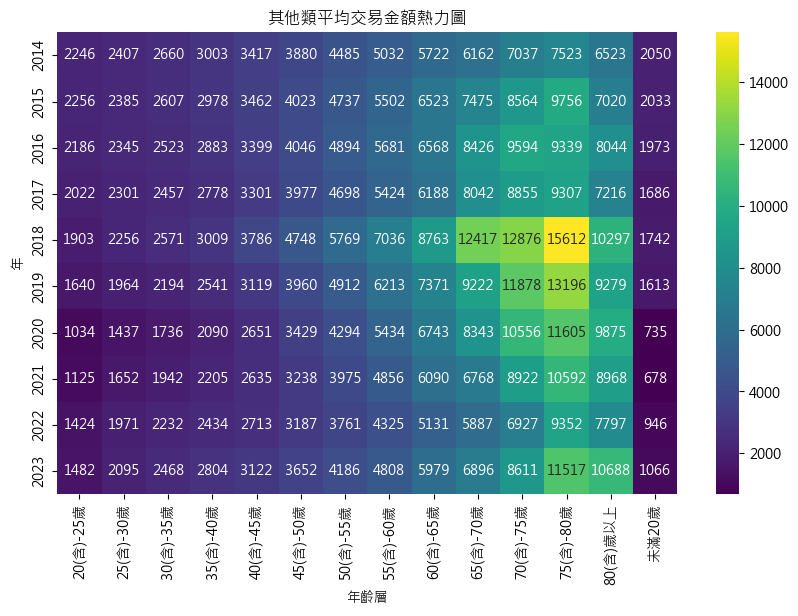

In [48]:
#其他類
grouped_data = df_other.groupby(['年', '年齡層']).agg({'信用卡交易金額[新台幣]': 'sum', '信用卡交易筆數': 'sum'}).reset_index()

# 計算 '平均交易金額'
grouped_data['平均交易金額'] = grouped_data['信用卡交易金額[新台幣]'] / grouped_data['信用卡交易筆數']

# 重新組織資料，使之符合你的格式
pivot_table_year = grouped_data.pivot_table(index='年齡層', columns='年', values='平均交易金額', aggfunc='mean')

# 將 '平均交易金額' 四捨五入並轉換為整數
pivot_table_year = pivot_table_year.round().astype(int)

# 將 '年齡層' 移到列(index)
pivot_table_year.reset_index(inplace=True)

# 顯示結果
print(pivot_table_year)

plt.rcParams['font.family'] = 'Microsoft JhengHei'
plt.figure(figsize=(10, 6))
sns.heatmap(pivot_table_year.set_index('年齡層').T, cmap='viridis', annot=True, fmt=".0f")
plt.title('其他類平均交易金額熱力圖')
plt.show()


In [49]:
df_other['信用卡交易筆數'] = df_other['信用卡交易筆數'] /1000000
df_other['信用卡交易金額[新台幣]'] = df_other['信用卡交易金額[新台幣]'] /100000000

C:\Users\User\AppData\Local\Temp\ipykernel_13628\1942249917.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_other['信用卡交易筆數'] = df_other['信用卡交易筆數'] /1000000
C:\Users\User\AppData\Local\Temp\ipykernel_13628\1942249917.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_other['信用卡交易金額[新台幣]'] = df_other['信用卡交易金額[新台幣]'] /100000000


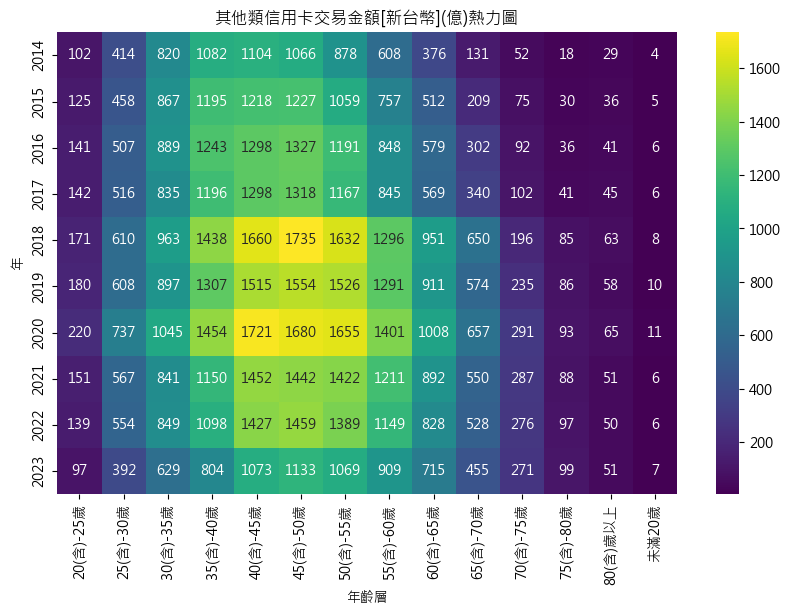

In [50]:
#其他類


grouped_data = df_other.groupby(['年', '年齡層']).agg({'信用卡交易金額[新台幣]': 'sum', '信用卡交易筆數': 'sum'}).reset_index()

# 計算 '平均交易金額'
#grouped_data['平均交易金額'] = grouped_data['信用卡交易金額[新台幣]'] / grouped_data['信用卡交易筆數']

pivot_table_year = grouped_data.pivot_table(index='年齡層', columns='年', values='信用卡交易金額[新台幣]', aggfunc='mean')

# 將 '平均交易金額' 四捨五入並轉換為整數
pivot_table_year = pivot_table_year.round().astype(int)

# 將 '年齡層' 移到列(index)
pivot_table_year.reset_index(inplace=True)

# 顯示結果
#print(pivot_table_year)

plt.rcParams['font.family'] = 'Microsoft JhengHei'
plt.figure(figsize=(10, 6))
sns.heatmap(pivot_table_year.set_index('年齡層').T, cmap='viridis', annot=True, fmt=".0f")
plt.title('其他類信用卡交易金額[新台幣](億)熱力圖')
plt.show()


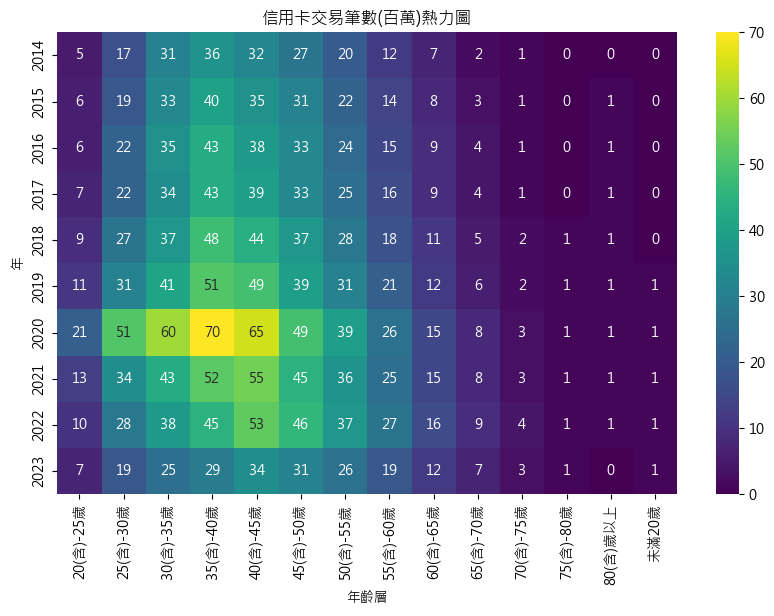

In [46]:
#其他類


grouped_data = df_other.groupby(['年', '年齡層']).agg({'信用卡交易金額[新台幣]': 'sum', '信用卡交易筆數': 'sum'}).reset_index()

# 計算 '平均交易金額'
#grouped_data['平均交易金額'] = grouped_data['信用卡交易金額[新台幣]'] / grouped_data['信用卡交易筆數']

pivot_table_year = grouped_data.pivot_table(index='年齡層', columns='年', values='信用卡交易筆數', aggfunc='mean')

# 將 '平均交易金額' 四捨五入並轉換為整數
pivot_table_year = pivot_table_year.round().astype(int)

# 將 '年齡層' 移到列(index)
pivot_table_year.reset_index(inplace=True)

# 顯示結果
#print(pivot_table_year)

plt.rcParams['font.family'] = 'Microsoft JhengHei'
plt.figure(figsize=(10, 6))
sns.heatmap(pivot_table_year.set_index('年齡層').T, cmap='viridis', annot=True, fmt=".0f")
plt.title('信用卡交易筆數(百萬)熱力圖')
plt.show()
